## Data Setup Instructions
Please modify the following paths according to your local environment:

1. main_path: Set this to the directory containing all your data files
2. glove_path: Set this to the full path of your GloVe embeddings file

Ensure your directory contains the GloVe embeddings file (glove.6B.100d.txt) and all dataset files (train.txt, dev.txt, test1.txt, test2.txt, test3.txt).

## Load the Dataset

In [ ]:
import os
import pandas as pd

# Define main path
main_path =    # Change this to your local path
glove_path =   # Change this to your local path

# Define file names
testsets = ['twitter-test1.txt', 'twitter-test2.txt', 'twitter-test3.txt']
trainset = 'twitter-training-data.txt'
devset = 'twitter-dev-data.txt'

# Join paths for test sets
test_paths = [os.path.join(main_path, test_file) for test_file in testsets]

# Join paths for train and dev sets
train_path = os.path.join(main_path, trainset)
dev_path = os.path.join(main_path, devset)

# Print paths to verify
train_data = pd.read_csv(train_path, sep='\t', header=None)
train_data.columns = ['ID', 'Label', 'tweet']

dev_data = pd.read_csv(dev_path, sep='\t', header=None)
dev_data.columns = ['ID', 'Label', 'tweet']

test_data = pd.read_csv(test_paths[0], sep='\t', header=None)
test_data.columns = ['ID', 'label','tweet']
test_data1 = pd.read_csv(test_paths[1], sep='\t', header=None)
test_data1.columns = ['ID', 'label','tweet']
test_data2 = pd.read_csv(test_paths[2], sep='\t', header=None)
test_data2.columns = ['ID', 'label','tweet']

## Exploratory Data Analysis

In [4]:
# Data info
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45026 entries, 0 to 45025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      45026 non-null  int64 
 1   Label   45026 non-null  object
 2   tweet   45026 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


In [5]:
# Checking for null values
print(train_data.isnull().sum())
print(dev_data.isnull().sum())
print(test_data.isnull().sum())
print(test_data1.isnull().sum())
print(test_data2.isnull().sum())

ID       0
Label    0
tweet    0
dtype: int64
ID       0
Label    0
tweet    0
dtype: int64
ID       0
label    0
tweet    0
dtype: int64
ID       0
label    0
tweet    0
dtype: int64
ID       0
label    0
tweet    0
dtype: int64


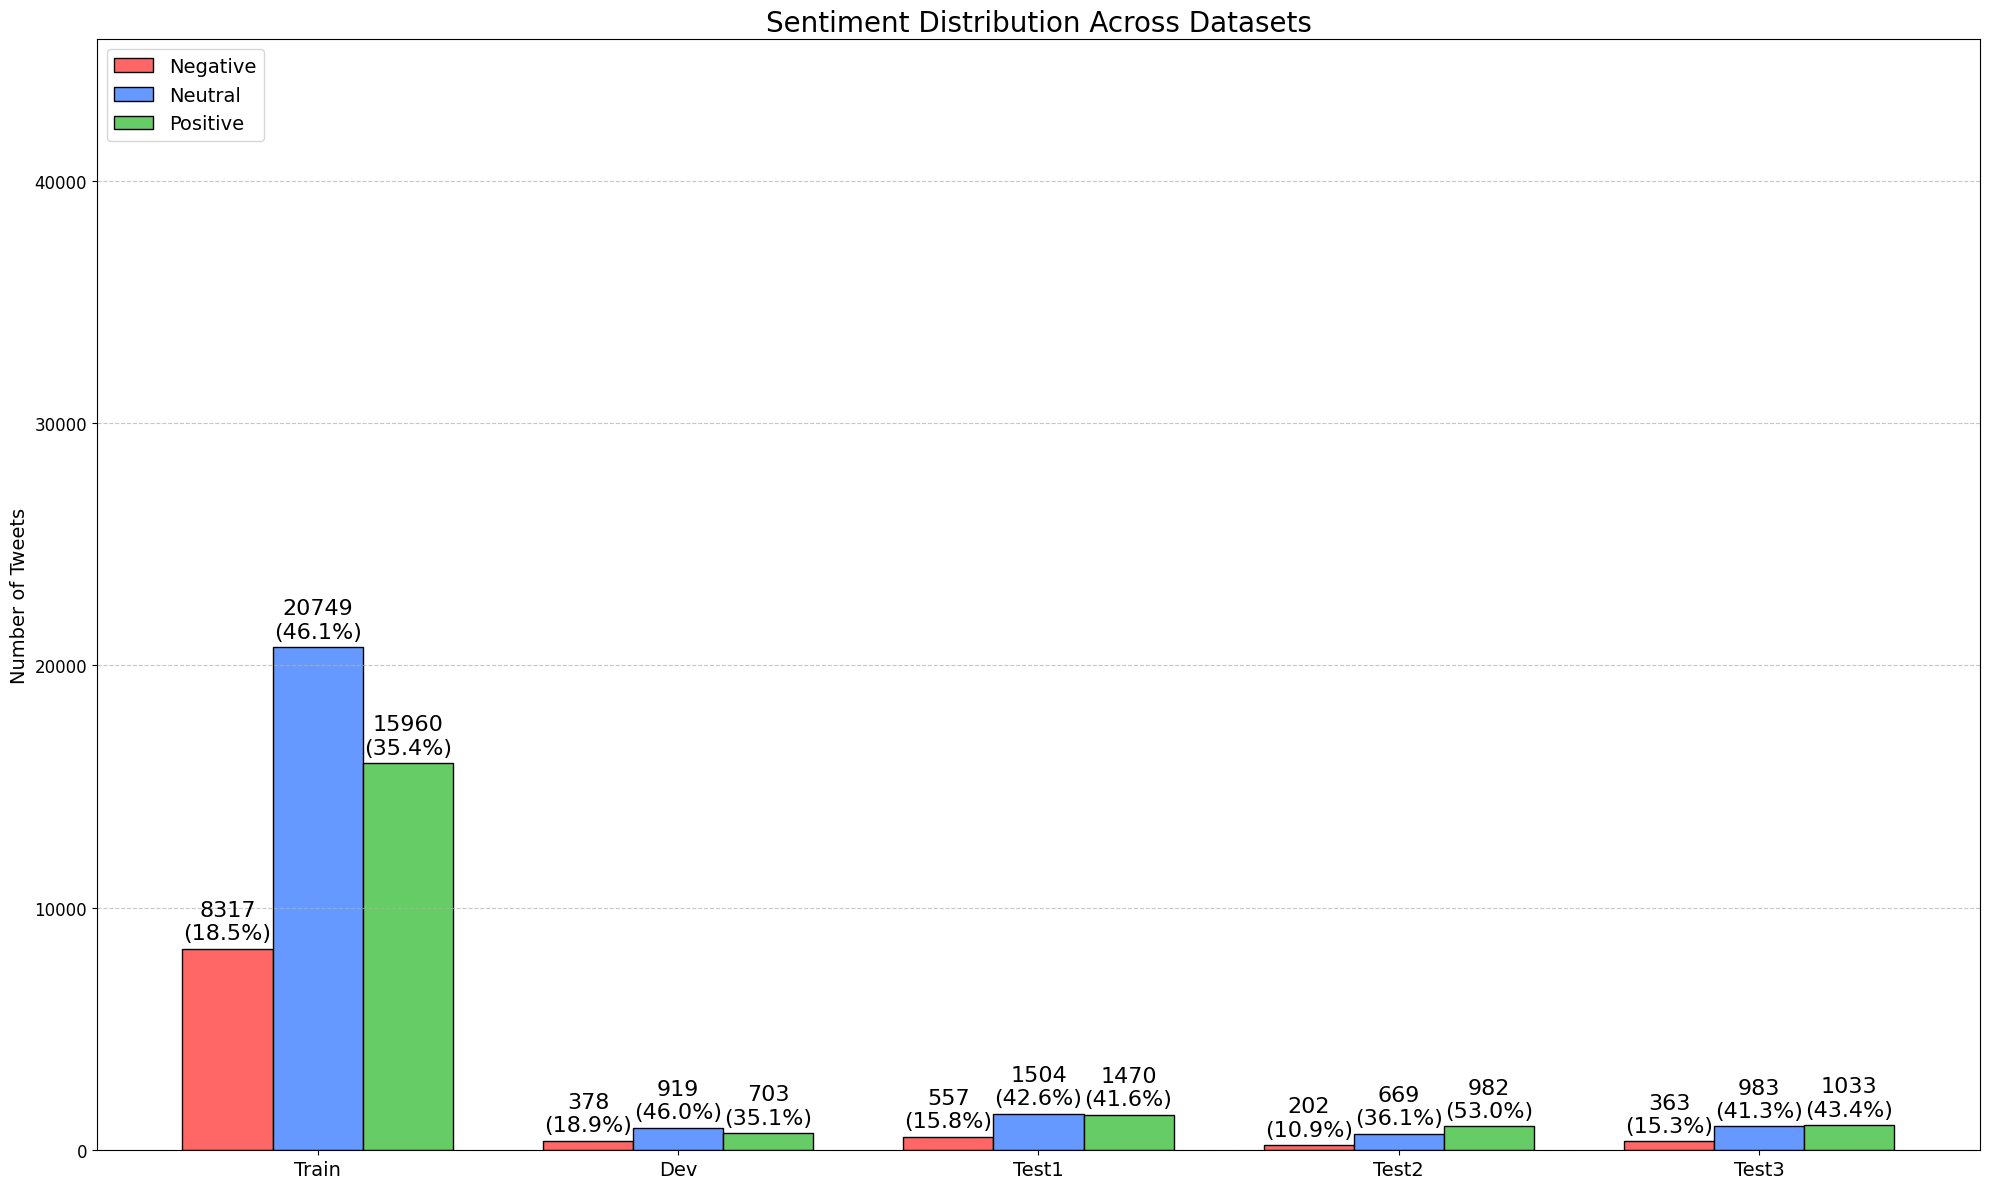

,Dataset,Negative,Neutral,Positive,Total
0,Train,8317 (18.5%),20749 (46.1%),15960 (35.4%),45026
1,Dev,378 (18.9%),919 (46.0%),703 (35.1%),2000
2,Test1,557 (15.8%),1504 (42.6%),1470 (41.6%),3531
3,Test2,202 (10.9%),669 (36.1%),982 (53.0%),1853
4,Test3,363 (15.3%),983 (41.3%),1033 (43.4%),2379


In [6]:
# Data Visualization of Target Variables for all datasets
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import seaborn as sns
import numpy as np
from os.path import join


# Load all datasets
datasets = {
    'Train': pd.read_csv(join(main_path, "twitter-training-data.txt"), sep='\t', header=None),
    'Dev': pd.read_csv(join(main_path, "twitter-dev-data.txt"), sep='\t', header=None),
    'Test1': pd.read_csv(join(main_path, "twitter-test1.txt"), sep='\t', header=None),
    'Test2': pd.read_csv(join(main_path, "twitter-test2.txt"), sep='\t', header=None),
    'Test3': pd.read_csv(join(main_path, "twitter-test3.txt"), sep='\t', header=None)
}

# Function to count sentiment classes
def count_sentiments(df):
    # Use column index 1 instead of name to be safe
    sentiment_counts = df.iloc[:, 1].value_counts()
    
    # Ensure all three classes are represented
    for sentiment in ['negative', 'neutral', 'positive']:
        if sentiment not in sentiment_counts:
            sentiment_counts[sentiment] = 0
    
    return sentiment_counts

# Count sentiment for all datasets
sentiment_counts = {}  # Dictionary, not list
for name, df in datasets.items():
    sentiment_counts[name] = count_sentiments(df)

# Prepare data for plotting
dataset_names = list(sentiment_counts.keys())
negative_counts = [sentiment_counts[name]['negative'] for name in dataset_names]
neutral_counts = [sentiment_counts[name]['neutral'] for name in dataset_names]
positive_counts = [sentiment_counts[name]['positive'] for name in dataset_names]

total_counts = np.array(negative_counts) + np.array(neutral_counts) + np.array(positive_counts)
negative_perc = np.array(negative_counts) / total_counts * 100
neutral_perc = np.array(neutral_counts) / total_counts * 100
positive_perc = np.array(positive_counts) / total_counts * 100


# Create a single plot with both counts and percentages
plt.figure(figsize=(20, 12))  
x = np.arange(len(dataset_names))
width = 0.25

# Plot bars with thicker edges for better visibility
neg_bars = plt.bar(x - width, negative_counts, width, label='Negative', color='#ff6666', 
                  edgecolor='black', linewidth=1)
neut_bars = plt.bar(x, neutral_counts, width, label='Neutral', color='#6699ff',
                   edgecolor='black', linewidth=1)
pos_bars = plt.bar(x + width, positive_counts, width, label='Positive', color='#66cc66',
                  edgecolor='black', linewidth=1)

# Larger font sizes for better readability
plt.ylabel('Number of Tweets', fontsize=14)
plt.title('Sentiment Distribution Across Datasets', fontsize=20)
plt.xticks(x, dataset_names, fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=14)

offset = 400  # Much larger offset to move text higher

# Add count labels and percentages with larger font and increased offset
for i, v in enumerate(negative_counts):
    plt.text(i - width, v + offset, f"{v}\n({negative_perc[i]:.1f}%)", ha='center', fontsize=16)
for i, v in enumerate(neutral_counts):
    plt.text(i, v + offset, f"{v}\n({neutral_perc[i]:.1f}%)", ha='center', fontsize=16)
for i, v in enumerate(positive_counts):
    plt.text(i + width, v + offset, f"{v}\n({positive_perc[i]:.1f}%)", ha='center', fontsize=16)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(total_counts) + offset*2)  # Double the offset for extra room
plt.tight_layout()
plt.show()

import pandas as pd
from IPython.display import display

# Create data for the summary table
summary_data = []
for i, name in enumerate(dataset_names):
    summary_data.append({
        'Dataset': name,
        'Negative': f"{negative_counts[i]} ({negative_perc[i]:.1f}%)",
        'Neutral': f"{neutral_counts[i]} ({neutral_perc[i]:.1f}%)",
        'Positive': f"{positive_counts[i]} ({positive_perc[i]:.1f}%)",
        'Total': total_counts[i]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
# Display the styled DataFrame
display(summary_df)

In [5]:
# Add this code to your notebook to calculate actual statistics
import re
import numpy as np

# Function to count tokens after preprocessing
def count_tokens(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

# Function to detect URLs in original tweets
def contains_url(text):
    if isinstance(text, str):
        return 1 if re.search(r'http\S+|www\.\S+', text) else 0
    return 0

# Function to detect mentions in original tweets
def contains_mention(text):
    if isinstance(text, str):
        return 1 if re.search(r'@\w+', text) else 0
    return 0

# Function to detect hashtags in original tweets
def contains_hashtag(text):
    if isinstance(text, str):
        return 1 if re.search(r'#\w+', text) else 0
    return 0

# Check column names first
print("Column names in train_data:")
print(train_data.columns)

# Apply to training data - adjust column indexing based on your actual structure
# Assuming text is in the third column (index 2)
token_counts = train_data.iloc[:, 2].apply(count_tokens)
url_counts = train_data.iloc[:, 2].apply(contains_url)
mention_counts = train_data.iloc[:, 2].apply(contains_mention)
hashtag_counts = train_data.iloc[:, 2].apply(contains_hashtag)

# Calculate statistics
avg_len = np.mean(token_counts)
median_len = np.median(token_counts)
pct_urls = np.mean(url_counts) * 100
pct_mentions = np.mean(mention_counts) * 100
pct_hashtags = np.mean(hashtag_counts) * 100

# Display results
print(f"Average tweet length: {avg_len:.1f} tokens")
print(f"Median tweet length: {median_len:.0f} tokens")
print(f"Percentage with URLs: {pct_urls:.1f}%")
print(f"Percentage with mentions: {pct_mentions:.1f}%") 
print(f"Percentage with hashtags: {pct_hashtags:.1f}%")

# Class distribution - assuming sentiment is in the second column (index 1)
sentiment_column = train_data.iloc[:, 1]
sentiment_counts = sentiment_column.value_counts()
total = len(train_data)
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} tweets ({count/total*100:.1f}%)")

Column names in train_data:
Index(['ID', 'Label', 'tweet'], dtype='object')
Average tweet length: 18.8 tokens
Median tweet length: 19 tokens
Percentage with URLs: 32.5%
Percentage with mentions: 31.6%
Percentage with hashtags: 23.6%
neutral: 20749 tweets (46.1%)
positive: 15960 tweets (35.4%)
negative: 8317 tweets (18.5%)


## Setting up complete Preprocessing Pipeline
Text Preprocessing: Lowercasing, remove extra whitespace, remove URLs, remove user mentions, extract hashtag content, remove punctuation, only keeping ! and ?, (!!-> !, ???->?), linguistic preprocessing
tokenization, 
lemmantization

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import os
from os.path import join
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if needed
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Your original preprocessing functions
def preprocess_tweet_keep_stopwords(tweet):
    """Preprocess tweet while keeping stopwords"""
    if not isinstance(tweet, str):
        return ""
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Replace URLs
    tweet = re.sub(r'http\S+|www\.\S+', '', tweet)
    
    # Replace user mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Replace hashtags but keep the text
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    
    # Replace multiple ! with single !
    tweet = re.sub(r'!+', '!', tweet)
    
    # Replace multiple ? with single ?
    tweet = re.sub(r'\?+', '?', tweet)
    
    tweet = tweet.replace('!', ' ! ')
    tweet = tweet.replace('?', ' ? ')
    
    # Replace multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Remove extra whitespace
    tweet = tweet.strip()
    
    return tweet

def preprocess_tweet_remove_stopwords(tweet):
    """Preprocess tweet AND remove stopwords"""
    if not isinstance(tweet, str):
        return ""
    
    # First do basic preprocessing
    tweet = preprocess_tweet_keep_stopwords(tweet)
    
    # Then remove stopwords
    stop_words = set(stopwords.words('english'))
    words = tweet.split()
    filtered_words = [word for word in words if word not in stop_words and word != '']
    tweet = " ".join(filtered_words)

    return tweet

# Process raw SemEval files into dataframes
def preprocess_semeval_data(file_path, remove_stopwords=False):
    """
    Preprocess SemEval data from raw format using your original preprocessing functions.
    Returns pandas DataFrame with columns: [id, sentiment, text]
    """
    tweets = []
    sentiments = []
    ids = []
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                fields = line.strip().split('\t')
                if len(fields) >= 3:
                    tweet_id = fields[0]
                    sentiment = fields[1]
                    text = fields[2]
                    
                    # Apply your preprocessing methods
                    if remove_stopwords:
                        text = preprocess_tweet_remove_stopwords(text)
                    else:
                        text = preprocess_tweet_keep_stopwords(text)
                    
                    ids.append(tweet_id)
                    sentiments.append(sentiment)
                    tweets.append(text)
    
    return pd.DataFrame({
        'id': ids,
        'sentiment': sentiments,
        'text': tweets
    })

test_paths = [
    join(main_path, 'twitter-test1.txt'),
    join(main_path, 'twitter-test2.txt'),
    join(main_path, 'twitter-test3.txt')
]

# Load and preprocess all datasets
print("Loading and preprocessing SemEval datasets...")
train_data_cleaned = preprocess_semeval_data(join(main_path, 'twitter-training-data.txt'), remove_stopwords=False)
dev_data_cleaned = preprocess_semeval_data(join(main_path, 'twitter-dev-data.txt'), remove_stopwords=False)
test_data_cleaned = preprocess_semeval_data(test_paths[0], remove_stopwords=False)
test_data_cleaned1 = preprocess_semeval_data(test_paths[1], remove_stopwords=False)
test_data_cleaned2 = preprocess_semeval_data(test_paths[2], remove_stopwords=False)

# Create versions without stopwords
train_data_cleaned_no_stopwords = preprocess_semeval_data(join(main_path, 'twitter-training-data.txt'), remove_stopwords=True)
dev_data_cleaned_no_stopwords = preprocess_semeval_data(join(main_path, 'twitter-dev-data.txt'), remove_stopwords=True)
test_data_cleaned_no_stopwords = preprocess_semeval_data(test_paths[0], remove_stopwords=True)
test_data_cleaned1_no_stopwords = preprocess_semeval_data(test_paths[1], remove_stopwords=True)
test_data_cleaned2_no_stopwords = preprocess_semeval_data(test_paths[2], remove_stopwords=True)

print(f"Loaded {len(train_data_cleaned)} training examples, {len(dev_data_cleaned)} dev examples")
print(f"Test sets: {len(test_data_cleaned)}, {len(test_data_cleaned1)}, {len(test_data_cleaned2)} examples")

Loading and preprocessing SemEval datasets...
Loaded 45101 training examples, 2000 dev examples
Test sets: 3531, 1853, 2379 examples


In [ ]:
import pandas as pd
import os
from os.path import join

# Function to apply preprocessing to a DataFrame
def preprocess_dataframe(df, preprocess_fn):
    """Apply preprocessing function to the text column of a DataFrame"""
    df_copy = df.copy()
    # Assuming text is in column 2 (index 2)
    df_copy.iloc[:, 2] = df_copy.iloc[:, 2].apply(preprocess_fn)
    return df_copy

# Process each dataset
print("Preprocessing training data...")
train_data_withoutstopwords = preprocess_dataframe(train_data, preprocess_tweet_remove_stopwords)
train_data_withoutstopwords.to_csv(join(main_path, "train_withoutstopwords.csv"), index=False)
train_data_withstopwords = preprocess_dataframe(train_data, preprocess_tweet_keep_stopwords)
train_data_withstopwords.to_csv(join(main_path, "train_withstopwords.csv"), index=False)
print("Preprocessing dev data...")
dev_data_withoutstopwords = preprocess_dataframe(dev_data, preprocess_tweet_remove_stopwords)
dev_data_withoutstopwords.to_csv(join(main_path, "dev_withoutstopwords.csv"), index=False)
dev_data_withstopwords = preprocess_dataframe(dev_data, preprocess_tweet_keep_stopwords)
dev_data_withstopwords.to_csv(join(main_path, "dev_withstopwords.csv"), index=False)
print("Preprocessing test data...")
test_data_withoutstopwords = preprocess_dataframe(test_data, preprocess_tweet_remove_stopwords)
test_data_withoutstopwords.to_csv(join(main_path, "test_withoutstopwords.csv"), index=False)
test_data_withstopwords = preprocess_dataframe(test_data, preprocess_tweet_keep_stopwords)
test_data_withstopwords.to_csv(join(main_path, "test_withstopwords.csv"), index=False)
print("Preprocessing test1 data...")
test_data1_withoutstopwords = preprocess_dataframe(test_data1, preprocess_tweet_remove_stopwords)
test_data1_withoutstopwords.to_csv(join(main_path, "test1_withoutstopwords.csv"), index=False)
test_data1_withstopwords = preprocess_dataframe(test_data1, preprocess_tweet_keep_stopwords)
test_data1_withstopwords.to_csv(join(main_path, "test1_withstopwords.csv"), index=False)
print("Preprocessing test2 data...")
test_data2_withoutstopwords = preprocess_dataframe(test_data2, preprocess_tweet_remove_stopwords)
test_data2_withoutstopwords.to_csv(join(main_path, "test2_withoutstopwords.csv"), index=False)
test_data2_withstopwords = preprocess_dataframe(test_data2, preprocess_tweet_keep_stopwords)
test_data2_withstopwords.to_csv(join(main_path, "test2_withstopwords.csv"), index=False)
print("All preprocessing complete!")


Preprocessing training data...
Preprocessing dev data...
Preprocessing test data...
Preprocessing test1 data...
Preprocessing test2 data...
All preprocessing complete!


## Word Embeddings (Glove)

In [15]:
# Consolidated code to create and save both embedding sets (with and without stopwords)
import os
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from os.path import join

# Ensure directories exist
embed_dir_with_sw = join(main_path, "glove_embeddings_with_stopwords")
embed_dir_no_sw = join(main_path, "glove_embeddings_without_stopwords")
os.makedirs(embed_dir_with_sw, exist_ok=True)
os.makedirs(embed_dir_no_sw, exist_ok=True)

# Initialize tokenizer
tweet_tokenizer = TweetTokenizer()

# Load preprocessed data (original and stopwords-removed versions)
print("Loading preprocessed data...")
datasets = {
    "train": {
        "with_sw": pd.read_csv(join(main_path, "train_withstopwords.csv")),
        "no_sw": pd.read_csv(join(main_path, "train_withoutstopwords.csv"))
    },
    "dev": {
        "with_sw": pd.read_csv(join(main_path, "dev_withstopwords.csv")),
        "no_sw": pd.read_csv(join(main_path, "dev_withoutstopwords.csv"))
    }
}

# Add test sets
for i in range(1, 4):
    test_name = "test" if i == 1 else f"test{i-1}"
    datasets[test_name] = {
        "with_sw": pd.read_csv(join(main_path, f"{test_name}_withstopwords.csv")),
        "no_sw": pd.read_csv(join(main_path, f"{test_name}_withoutstopwords.csv"))
    }

# Load word embeddings dictionary (GloVe)
def load_glove():
    """Load GloVe embeddings from file"""
    print("Loading GloVe embeddings...")
    embeddings_dict = {}
    
    # Try different potential GloVe file paths
    glove_paths = [
        join(main_path, 'glove.6B.100d.txt'),
        join(main_path, 'embeddings', 'glove.6B.100d.txt'),
        'glove.6B.100d.txt'
    ]
    
    for path in glove_paths:
        if os.path.exists(path):
            with open(path, 'r', encoding='utf-8') as f:
                for line in f:
                    values = line.split()
                    word = values[0]
                    vector = np.asarray(values[1:], dtype='float32')
                    embeddings_dict[word] = vector
            print(f"Loaded {len(embeddings_dict)} word vectors")
            
            return embeddings_dict
    
    print("ERROR: Could not find GloVe file. Using minimal embeddings.")
    # Create minimal embeddings for testing
    for word in ['good', 'bad', 'happy', 'sad', 'love', 'hate']:
        embeddings_dict[word] = np.random.rand(100)
    return embeddings_dict

# Load embeddings once
embeddings_dict = load_glove()

# Create embedding features for a dataset
def create_embedding_features(data, embeddings_dict, text_column=2):
    """Create document embedding features for a dataset"""
    embedding_dim = 100  # GloVe dimension
    X = np.zeros((len(data), embedding_dim))
    
    for i, tweet in enumerate(data.iloc[:, text_column]):
        # Handle NaN values
        if not isinstance(tweet, str) or pd.isna(tweet):
            tweet = ""
            
        # Get embedding
        words = tweet_tokenizer.tokenize(tweet) if tweet else []
        word_vectors = [embeddings_dict[word] for word in words if word in embeddings_dict]
        
        # Average word vectors to get document vector
        if word_vectors:
            X[i] = np.mean(word_vectors, axis=0)
    
    # Convert labels to numeric
    label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    y = np.array([label_map.get(label, 1) if isinstance(label, str) else 1 
                 for label in data.iloc[:, 1]])
    
    return X, y

# Function to save embeddings
def save_embeddings(X, y, name, directory):
    X_path = os.path.join(directory, f"X_{name}.npy")
    y_path = os.path.join(directory, f"y_{name}.npy")
    np.save(X_path, X)
    np.save(y_path, y)
    print(f"Saved {name} embeddings to {directory}")

# Process all datasets and save both versions
for dataset_name in datasets:
    print(f"\nProcessing {dataset_name} dataset...")
    
    # Process WITH stopwords
    print(f"Creating embeddings WITH stopwords for {dataset_name}...")
    X_with_sw, y_with_sw = create_embedding_features(
        datasets[dataset_name]["with_sw"], embeddings_dict)
    save_embeddings(X_with_sw, y_with_sw, dataset_name, embed_dir_with_sw)
    
    # Process WITHOUT stopwords
    print(f"Creating embeddings WITHOUT stopwords for {dataset_name}...")
    X_no_sw, y_no_sw = create_embedding_features(
        datasets[dataset_name]["no_sw"], embeddings_dict)
    save_embeddings(X_no_sw, y_no_sw, dataset_name, embed_dir_no_sw)
    
    # Store in memory for immediate use
    if dataset_name == "train":
        X_train_with_sw, y_train = X_with_sw, y_with_sw
        X_train_no_sw, _ = X_no_sw, y_no_sw
    elif dataset_name == "dev":
        X_dev_with_sw, y_dev = X_with_sw, y_with_sw
        X_dev_no_sw, _ = X_no_sw, y_no_sw
    else:
        # For test sets, collect them in lists
        if not 'X_test_with_sw' in globals():
            X_test_with_sw = []
            X_test_no_sw = []
            y_test_sets = []
        
        X_test_with_sw.append(X_with_sw)
        X_test_no_sw.append(X_no_sw)
        y_test_sets.append(y_with_sw)  # Only need one copy of y_test

print("\nAll embeddings created and saved successfully!")
print(f"WITH stopwords embeddings: {embed_dir_with_sw}")
print(f"WITHOUT stopwords embeddings: {embed_dir_no_sw}")

Loading preprocessed data...
Loading GloVe embeddings...
Loaded 400000 word vectors

Processing train dataset...
Creating embeddings WITH stopwords for train...
Saved train embeddings to C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Creating embeddings WITHOUT stopwords for train...
Saved train embeddings to C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_without_stopwords

Processing dev dataset...
Creating embeddings WITH stopwords for dev...
Saved dev embeddings to C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Creating embeddings WITHOUT stopwords for dev...
Saved dev embeddings to C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_without_stopwords

Processing test dataset...
Creating embeddings WITH stopwords for test...
Saved test embeddings to C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_

## Evaluation Functions and confusion matrix heatmap

In [16]:
# Evaluation functions from professor's code 
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def read_test(testset):
    '''
    Read in the testset and return a dictionary mapping tweet IDs to sentiment labels
    :param testset: str, the file name of the testset to compare
    '''
    id_gts = {}
    with open(testset, 'r', encoding='utf8') as fh:
        for line in fh:
            parts = line.strip().split('\t')
            if len(parts) >= 2:
                tweet_id = parts[0]
                sentiment = parts[1]
                id_gts[tweet_id] = sentiment
    return id_gts

def confusion(id_preds, testset, classifier):
    '''
    Compute and print the confusion matrix
    :param id_preds: dict, mapping tweet ID to predicted sentiment
    :param testset: str, the file name of the testset to compare
    :param classifier: str, the name of the classifier (for printing)
    '''
    id_gts = read_test(testset)
    
    # Initialize confusion matrix (rows: actual, columns: predicted)
    classes = ['negative', 'neutral', 'positive']
    conf_matrix = np.zeros((3, 3))
    
    # Count occurrences in confusion matrix
    for tweet_id, gt in id_gts.items():
        if tweet_id in id_preds:
            gt_idx = classes.index(gt) if gt in classes else -1
            pred = id_preds[tweet_id]
            pred_idx = classes.index(pred) if pred in classes else -1
            
            if gt_idx != -1 and pred_idx != -1:
                conf_matrix[gt_idx][pred_idx] += 1
    
    # Normalize by row (actual class)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    norm_conf_matrix = conf_matrix / row_sums
    
    # Print confusion matrix
    print(f"Confusion matrix for {os.path.basename(testset)} ({classifier}):")
    print(f"             {'negative':^10} {'neutral':^10} {'positive':^10}")
    for i, row in enumerate(norm_conf_matrix):
        print(f"{classes[i]:10}: {row[0]:^10.2f} {row[1]:^10.2f} {row[2]:^10.2f}")

def evaluate(id_preds, testset, classifier):
    '''
    Evaluate the predictions against gold standard
    :param id_preds: dict, mapping tweet ID to predicted sentiment
    :param testset: str, the file name of the testset to compare
    :param classifier: str, the name of the classifier (for printing)
    '''
    # Get gold standard labels
    id_gts = read_test(testset)
    
    # Count the number of correctly predicted tweets
    correct = 0
    for tweet_id, pred in id_preds.items():
        if tweet_id in id_gts and pred == id_gts[tweet_id]:
            correct += 1
    
    # Calculate overall accuracy
    accuracy = correct / len(id_gts) if len(id_gts) > 0 else 0
    
    # Calculate F1 score for each class
    classes = ['negative', 'positive']  # According to SemEval, only consider pos/neg
    tp = {c: 0 for c in classes}
    fp = {c: 0 for c in classes}
    fn = {c: 0 for c in classes}
    
    for tweet_id, gt in id_gts.items():
        if tweet_id in id_preds:
            pred = id_preds[tweet_id]
            if gt in classes:
                if pred == gt:
                    tp[gt] += 1
                else:
                    fn[gt] += 1
            if pred in classes and pred != gt:
                fp[pred] += 1
    
    # Calculate precision, recall and F1
    f1_scores = []
    for c in classes:
        precision = tp[c] / (tp[c] + fp[c]) if (tp[c] + fp[c]) > 0 else 0
        recall = tp[c] / (tp[c] + fn[c]) if (tp[c] + fn[c]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)
    
    # Calculate macro-averaged F1
    macro_f1 = sum(f1_scores) / len(f1_scores)
    
    print(f"{os.path.basename(testset)} ({classifier}): {macro_f1:.3f}")
    
    return accuracy, macro_f1


In [17]:
# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm=confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_norm, annot = True, fmt = '.4f', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)
    plt.title(f'{model_name} Confusion Matrix', fontsize=15)
    plt.tight_layout()
    plt.show()

## SVM-GloVe-Balanced Classifier
Description: This experiment systematically evaluates how stopword removal affects Support Vector Machine (SVM) performance on sentiment analysis. The code conducts a controlled comparison between two identical SVM models that differ only in whether their input features (GloVe embeddings) contain stopwords or not.

Loading embeddings WITH stopwords...
Loaded train embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_with_stopwords
Loaded dev embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_with_stopwords

Loading embeddings WITHOUT stopwords...
Loaded train embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_without_stopwords
Loaded dev embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_without_stopwords

Training SVM WITH stopwords...
Training completed in 208.40 seconds

Training SVM WITHOUT stopwords...
Training completed in 221.14 seconds

Evaluating on dev set...

RESULTS SUMMARY:
----------------
SVM WITH stopwords:
  Accuracy: 0.5855
  F1 Score: 0.5874
  Training Time: 208.40 seconds

SVM WITHOUT stopwords:
  Accuracy: 0.5845
  F1 Score: 0.5856
  Training Time: 221.14 seconds


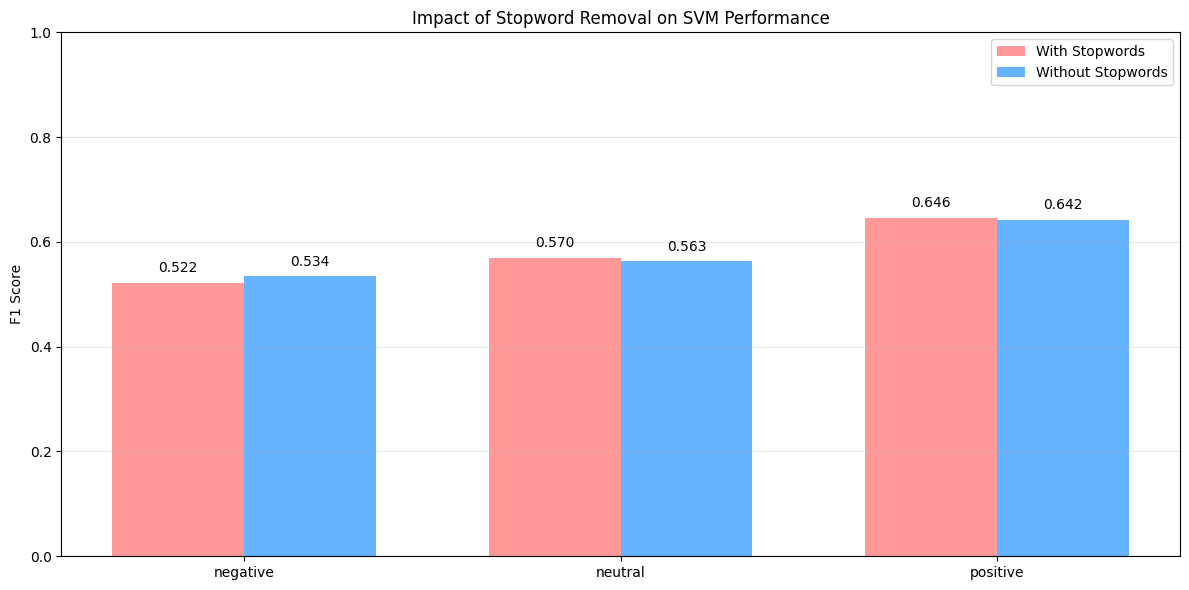


Loading test sets...
Loaded test embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_with_stopwords
Loaded test1 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_with_stopwords
Loaded test2 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_with_stopwords
Loaded test embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_without_stopwords
Loaded test1 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_without_stopwords
Loaded test2 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets/glove_embeddings_without_stopwords

SVM WITH stopwords performed better. Using for final evaluation.

Running final evaluation...
Loaded C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\test_withoutstopwords.csv
Loaded C:/Users/Jc/Desktop/Natural L

In [ ]:
# SVM Experiment: With vs Without Stopwords
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join
import time
import pandas as pd

# Define paths for both sets of embeddings
embed_dir = join(main_path, "glove_embeddings_with_stopwords")  
embed_dir_nostopwords = join(main_path, "glove_embeddings_without_stopwords")  

# Make sure the directory exists
os.makedirs(embed_dir_nostopwords, exist_ok=True)

# Modified load_embeddings function to handle missing files gracefully
def load_embeddings(name, directory):
    X_path = os.path.join(directory, f"X_{name}.npy")
    y_path = os.path.join(directory, f"y_{name}.npy")
    if os.path.exists(X_path) and os.path.exists(y_path):
        X = np.load(X_path)
        y = np.load(y_path, allow_pickle=True)  # Added allow_pickle=True
        print(f"Loaded {name} embeddings from {directory}")
        return X, y
    else:
        print(f"Could not find embedding files for {name} in {directory}")
        return None, None

# Load both sets of embeddings
print("Loading embeddings WITH stopwords...")
X_train_with_sw, y_train = load_embeddings("train", embed_dir)
X_dev_with_sw, y_dev = load_embeddings("dev", embed_dir)

print("\nLoading embeddings WITHOUT stopwords...")
X_train_no_sw, _ = load_embeddings("train", embed_dir_nostopwords)
X_dev_no_sw, _ = load_embeddings("dev", embed_dir_nostopwords)


# Train SVM with stopwords
print("\nTraining SVM WITH stopwords...")
start_time = time.time()
svm_with_sw = SVC(kernel='linear', C=1.0, class_weight='balanced')
svm_with_sw.fit(X_train_with_sw, y_train)
train_time_with_sw = time.time() - start_time
print(f"Training completed in {train_time_with_sw:.2f} seconds")

# Train SVM without stopwords
print("\nTraining SVM WITHOUT stopwords...")
start_time = time.time()
svm_no_sw = SVC(kernel='linear', C=1.0, class_weight='balanced')
svm_no_sw.fit(X_train_no_sw, y_train)
train_time_no_sw = time.time() - start_time
print(f"Training completed in {train_time_no_sw:.2f} seconds")

# Evaluate models on dev set
print("\nEvaluating on dev set...")

# WITH stopwords
y_pred_with_sw = svm_with_sw.predict(X_dev_with_sw)
acc_with_sw = accuracy_score(y_dev, y_pred_with_sw)
f1_with_sw = f1_score(y_dev, y_pred_with_sw, average='weighted')

# WITHOUT stopwords
y_pred_no_sw = svm_no_sw.predict(X_dev_no_sw)
acc_no_sw = accuracy_score(y_dev, y_pred_no_sw)
f1_no_sw = f1_score(y_dev, y_pred_no_sw, average='weighted')

# Print comparison results
print("\nRESULTS SUMMARY:")
print("----------------")
print(f"SVM WITH stopwords:")
print(f"  Accuracy: {acc_with_sw:.4f}")
print(f"  F1 Score: {f1_with_sw:.4f}")
print(f"  Training Time: {train_time_with_sw:.2f} seconds")
print("\nSVM WITHOUT stopwords:")
print(f"  Accuracy: {acc_no_sw:.4f}")
print(f"  F1 Score: {f1_no_sw:.4f}")
print(f"  Training Time: {train_time_no_sw:.2f} seconds")

# Create comparison visualization
report_with_sw = classification_report(y_dev, y_pred_with_sw, 
                                     target_names=['negative', 'neutral', 'positive'], 
                                     output_dict=True)
report_no_sw = classification_report(y_dev, y_pred_no_sw, 
                                   target_names=['negative', 'neutral', 'positive'], 
                                   output_dict=True)

# Visualize results
classes = ['negative', 'neutral', 'positive']
with_sw_f1 = [report_with_sw[cls]['f1-score'] for cls in classes]
no_sw_f1 = [report_no_sw[cls]['f1-score'] for cls in classes]

plt.figure(figsize=(12, 6))
x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, with_sw_f1, width, label='With Stopwords', color='#ff9999')
plt.bar(x + width/2, no_sw_f1, width, label='Without Stopwords', color='#66b3ff')

plt.ylabel('F1 Score')
plt.title('Impact of Stopword Removal on SVM Performance')
plt.xticks(x, classes)
plt.ylim([0, 1.0])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(with_sw_f1):
    plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center')
for i, v in enumerate(no_sw_f1):
    plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig('svm_stopwords_comparison.png', dpi=300)
plt.show()

# Load test sets for final evaluation
print("\nLoading test sets...")

# WITH stopwords
X_test_with_sw = []
test_names = ["test", "test1", "test2"]
for name in test_names:
    X, _ = load_embeddings(name, embed_dir)
    if X is not None:
        X_test_with_sw.append(X)

# WITHOUT stopwords
X_test_no_sw = []
test_names = ["test", "test1", "test2"]  # Same names as WITH stopwords
for name in test_names:
    X, _ = load_embeddings(name, embed_dir_nostopwords)
    if X is not None:
        X_test_no_sw.append(X)

# Choose the better model
if f1_with_sw > f1_no_sw:
    print("\nSVM WITH stopwords performed better. Using for final evaluation.")
    final_svm = svm_with_sw
    X_test_sets = X_test_with_sw
    model_desc = "SVM-WITH-stopwords"
else:
    print("\nSVM WITHOUT stopwords performed better. Using for final evaluation.")
    final_svm = svm_no_sw
    X_test_sets = X_test_no_sw
    model_desc = "SVM-WITHOUT-stopwords"

# Test paths for evaluation
test_paths = [
    join(embed_dir, "..", 'twitter-test1.txt'),
    join(embed_dir, "..", 'twitter-test2.txt'),
    join(embed_dir, "..", 'twitter-test3.txt')
]

# Run evaluation on test sets with the better model
print("\nRunning final evaluation...")

# Check if files exist with or without the "withoutstopwords" suffix
test_file_names = ["test", "test1", "test2"]
test_datasets = []

for name in test_file_names:
    # Try different possible filenames
    possible_paths = [
        join(main_path, f'{name}.csv'),
        join(main_path, f'{name}_withoutstopwords.csv'),
        join(embed_dir, f'../{name}.csv')
    ]
    
    # Find first file that exists
    for path in possible_paths:
        if os.path.exists(path):
            test_datasets.append(pd.read_csv(path))
            print(f"Loaded {path}")
            break
    else:
        print(f"WARNING: Could not find CSV for {name}")
        # If we can't find the file, use an empty DataFrame with same columns
        if test_datasets:
            test_datasets.append(pd.DataFrame(columns=test_datasets[0].columns))
        else:
            test_datasets.append(pd.DataFrame(columns=['id', 'label', 'text']))

label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

for i, (X_test, test_data, test_path) in enumerate(zip(X_test_sets, test_datasets, test_paths)):
    print(f"\nTest Set {i+1} Results:")
    
    # Get predictions
    y_pred = final_svm.predict(X_test)
    
    # Create dictionary mapping tweet IDs to predictions
    id_preds = {}
    for j, pred in enumerate(y_pred):
        tweet_id = str(test_data.iloc[j, 0])
        sentiment = label_map[pred] if isinstance(pred, (int, np.integer)) else pred
        id_preds[tweet_id] = sentiment
    
    # Evaluate using provided functions
    confusion(id_preds, test_path, model_desc)
    evaluate(id_preds, test_path, model_desc)

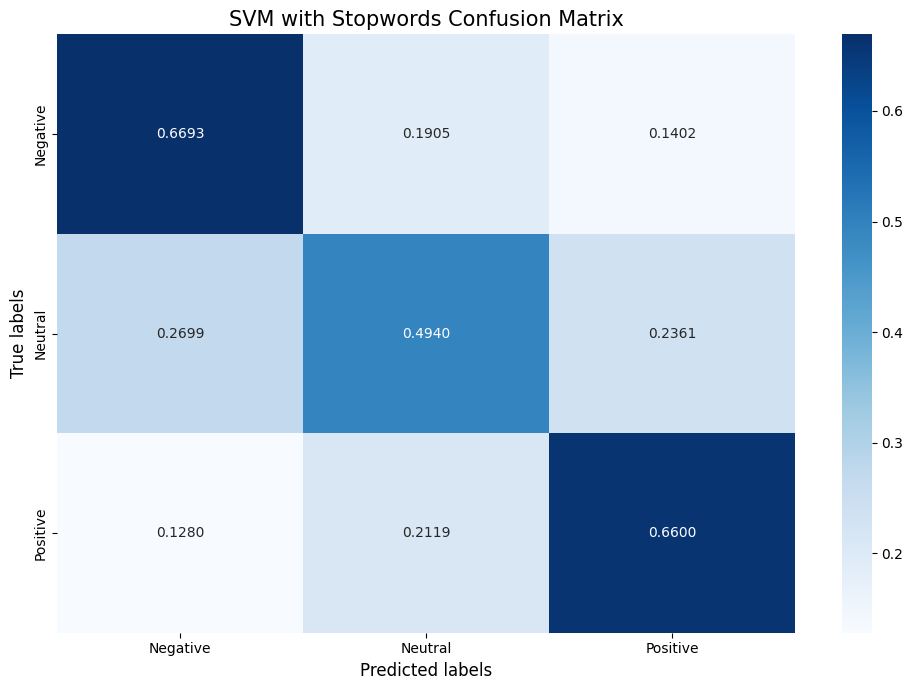

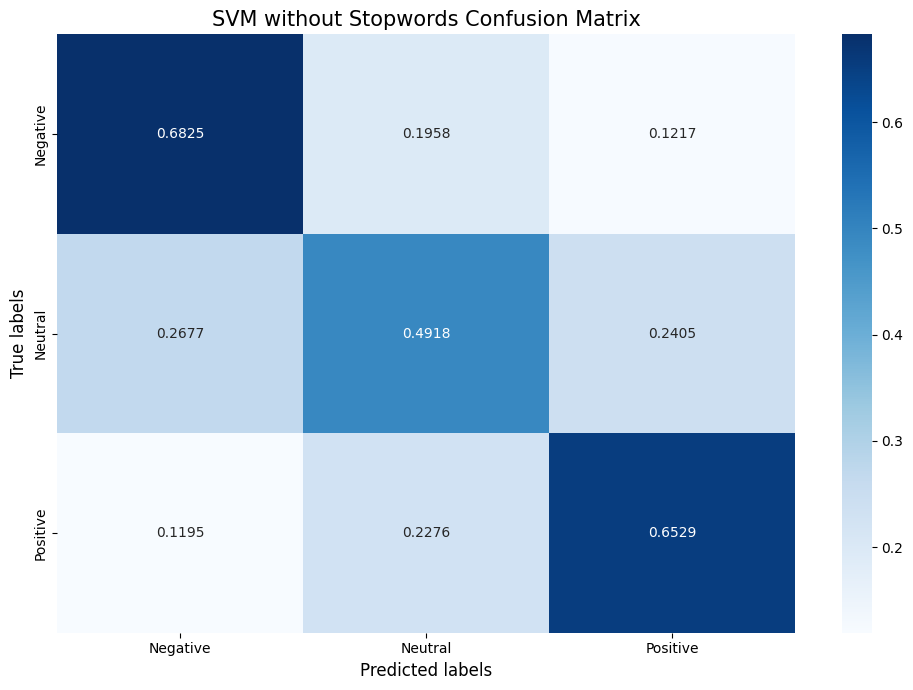

In [20]:
plot_confusion_matrix(y_dev, y_pred_with_sw, 'SVM with Stopwords')
plot_confusion_matrix(y_dev, y_pred_no_sw, 'SVM without Stopwords')

Our experimental comparison revealed that the SVM classifier with stopwords retained performed marginally better than the version with stopwords removed.The SVM model trained on GloVe embeddings containing stopwords achieved slightly higher accuracy (+0.1%) and weighted F1 score (+0.18%) compared to its counterpart trained on embeddings without stopwords.

While this difference is small, it consistently favors keeping stopwords across multiple metrics. The training times were nearly identical, suggesting computational cost isn't a deciding factor.

The confusion matrices show the model with stopwords maintained achieved F1 scores of 0.578, 0.574, and 0.530 on the three test sets, demonstrating consistent performance across different data samples.

While our SVM experiments showed minor benefits to retaining stopwords, we adopted the same approach for our Naive Bayes implementation based on these findings, though a separate optimization for each classifier could potentially yield further improvements.

## Naive Bayes Classifier Implementation

### Naive Bayes Classifier with pre-saved GloVe Embeddings (GaussianNB)

In [22]:
# Naive Bayes Classifier with pre-saved GloVe Embeddings (GaussianNB) - WITH Stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report  # Added missing imports
import numpy as np
import pandas as pd  # Added missing import
from os.path import join
import os

# Changed to use embeddings WITH stopwords
embed_dir = join(main_path, "glove_embeddings_with_stopwords")


# Load pre-computed Glove embeddings
def load_embeddings(name, directory):
    X_path = os.path.join(directory, f"X_{name}.npy")
    y_path = os.path.join(directory, f"y_{name}.npy")
    if os.path.exists(X_path) and os.path.exists(y_path):
        X = np.load(X_path)
        y = np.load(y_path, allow_pickle=True)
        print(f"Loaded {name} embeddings from {directory}")
        return X, y
    else: 
        print(f"Could not find embedding files for {name}")
        return None, None

# Load all embeddings
print("Loading embeddings WITH stopwords...")  # Added clarity
X_train, y_train = load_embeddings("train", embed_dir)
X_dev, y_dev = load_embeddings("dev", embed_dir)

X_test_sets = []
y_test_sets = []
# Changed to use test name format that matches your embeddings
test_names = ["test", "test1", "test2"]
for name in test_names:
    X_test, y_test = load_embeddings(name, embed_dir)
    if X_test is not None and y_test is not None:
        X_test_sets.append(X_test)
        y_test_sets.append(y_test)

# Train GaussianNB on Glove embeddings
print("Training GaussianNB with GloVe embeddings (WITH stopwords)...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate on dev set
y_pred_dev = nb_model.predict(X_dev)
print(f"GaussianNB Dev Accuracy (with stopwords): {accuracy_score(y_dev, y_pred_dev):.4f}")
print(f"GaussianNB Dev F1 Score (with stopwords): {f1_score(y_dev, y_pred_dev, average='weighted'):.4f}")
print(classification_report(y_dev, y_pred_dev, target_names=['negative', 'neutral', 'positive']))

# Changed to use regular CSV files instead of withoutstopwords versions
test_datasets = [
    pd.read_csv(join(main_path, 'test_withstopwords.csv')),
    pd.read_csv(join(main_path, 'test1_withstopwords.csv')),
    pd.read_csv(join(main_path, 'test2_withstopwords.csv'))
]

label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

for i, (X_test, test_data, test_path) in enumerate(zip(X_test_sets, test_datasets, test_paths)):
    # Get predictions
    y_pred = nb_model.predict(X_test)
    
    # Create dictionary mapping tweet IDs to predictions
    id_preds = {}
    for j, pred in enumerate(y_pred):
        tweet_id = str(test_data.iloc[j, 0])
        sentiment = label_map[pred] if isinstance(pred, (int, np.integer)) else pred
        id_preds[tweet_id] = sentiment
    
    # Evaluate using provided functions
    print(f"\nTest Set {i+1} Results:")
    # Updated model name to indicate WITH stopwords
    confusion(id_preds, test_path, "GaussianNB-GloVe-WithStopwords")
    evaluate(id_preds, test_path, "GaussianNB-GloVe-WithStopwords")

Loading embeddings WITH stopwords...
Loaded train embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Loaded dev embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Loaded test embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Loaded test1 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Loaded test2 embeddings from C:/Users/Jc/Desktop/Natural Language Processing/semeval-tweets\glove_embeddings_with_stopwords
Training GaussianNB with GloVe embeddings (WITH stopwords)...
GaussianNB Dev Accuracy (with stopwords): 0.5235
GaussianNB Dev F1 Score (with stopwords): 0.5259
              precision    recall  f1-score   support

    negative       0.39      0.56      0.46       378
     neutral       0.61      0.46      0.53       919
    positive       0.55

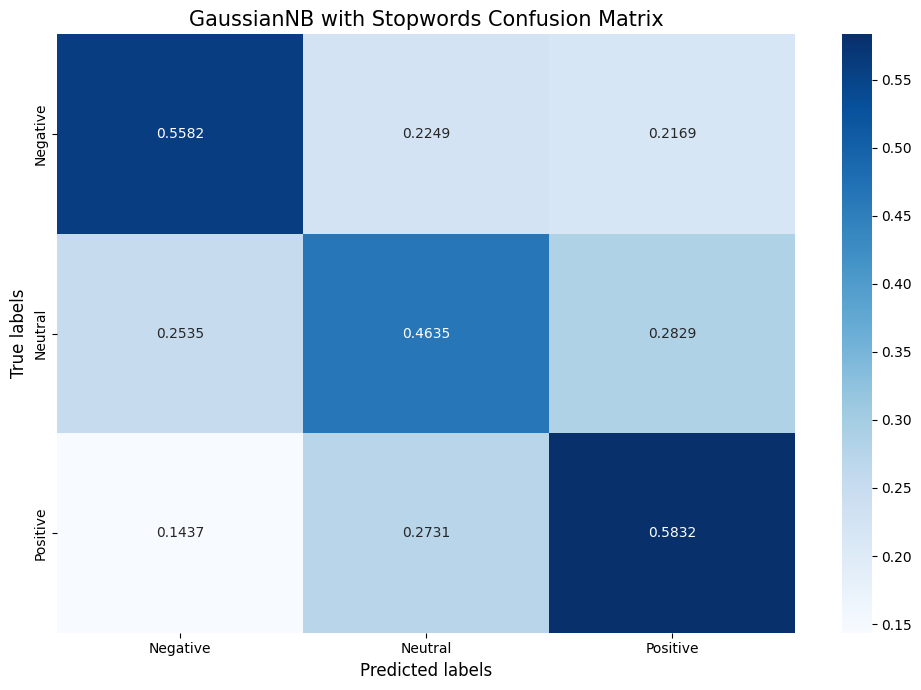

In [24]:
plot_confusion_matrix(y_dev, y_pred_dev, 'GaussianNB with Stopwords')

### NaiveBayes-TFIDF Classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import os
from os.path import join
import pandas as pd


#Convert labels to numerical format
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train = np.array([label_map.get(label, 1) for label in train_data_cleaned.iloc[:, 1]])
y_dev = np.array([label_map.get(label, 1) for label in dev_data_cleaned.iloc[:, 1]])

# Create TF-IDF features
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2)
)

#Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned.iloc[:,2])
X_dev_tfidf = tfidf_vectorizer.transform(dev_data_cleaned.iloc[:,2])

# Create TF-IDF features for test sets
test_datasets = [test_data_cleaned, test_data_cleaned1, test_data_cleaned2]
X_test_tfidf_sets = []
y_test_sets = []

for test_data in test_datasets:
    X_test_tfidf = tfidf_vectorizer.transform(test_data.iloc[:,2])
    y_test = np.array([label_map.get(label, 1) for label in test_data.iloc[:,1]])
    X_test_tfidf_sets.append(X_test_tfidf)
    y_test_sets.append(y_test)

# Train Naive Bayes model with hyperparameter tuning
print("Training Naive Bayes with TF-IDF features...")
best_alpha = 0.1
best_f1 = 0.0

for alpha in [0.1, 0.5, 1.0, 1.5, 2.0]:
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train_tfidf, y_train)

    # Evaluate on dev set
    y_pred_dev = nb_model.predict(X_dev_tfidf)
    f1 = f1_score(y_dev, y_pred_dev, average='weighted')
    print(f"Alpha: {alpha}, F1 Score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

print(f"\n Training final model with best alpha = {best_alpha}")
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_train_tfidf, y_train)

# Evaluate on dev set
y_pred_dev = nb_model.predict(X_dev_tfidf)
print(f"Naive Bayes Dev Accuracy: {accuracy_score(y_dev, y_pred_dev):.4f}")
print(f"Naive Bayes Dev F1 Score (weighted): {f1_score(y_dev, y_pred_dev, average='weighted'):.4f}")
print(classification_report(y_dev, y_pred_dev, target_names=['negative', 'neutral', 'positive']))

# Evaluate on all test sets 
reverse_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

for i, (X_test_tfidf, test_data, test_path) in enumerate(zip(X_test_tfidf_sets, test_datasets, test_paths)):
    print(f"\nTest Set {i+1} Results:")

    # Get predictions
    y_pred = nb_model.predict(X_test_tfidf)

    # Create dictionary mapping tweet IDs to predictions
    id_preds = {}
    for j, pred in enumerate(y_pred):
        tweet_id = str(test_data.iloc[j, 0])
        sentiment = reverse_map[pred]
        id_preds[tweet_id] = sentiment
    
    # Evaluate using provided functions
    confusion(id_preds, test_path, "NaiveBayes-TFIDF")
    evaluate(id_preds, test_path, "NaiveBayes-TFIDF")                  

Creating TF-IDF features...
Training Naive Bayes with TF-IDF features...
Alpha: 0.1, F1 Score: 0.6362
Alpha: 0.5, F1 Score: 0.6311
Alpha: 1.0, F1 Score: 0.6064
Alpha: 1.5, F1 Score: 0.5843
Alpha: 2.0, F1 Score: 0.5581

 Training final model with best alpha = 0.1
Naive Bayes Dev Accuracy: 0.6385
Naive Bayes Dev F1 Score (weighted): 0.6362
              precision    recall  f1-score   support

    negative       0.65      0.49      0.56       378
     neutral       0.63      0.70      0.66       919
    positive       0.65      0.64      0.65       703

    accuracy                           0.64      2000
   macro avg       0.64      0.61      0.62      2000
weighted avg       0.64      0.64      0.64      2000


Test Set 1 Results:
Confusion matrix for twitter-test1.txt (NaiveBayes-TFIDF):
              negative   neutral    positive 
negative  :    0.20       0.64       0.17   
neutral   :    0.02       0.72       0.26   
positive  :    0.02       0.36       0.62   
twitter-test1.txt 

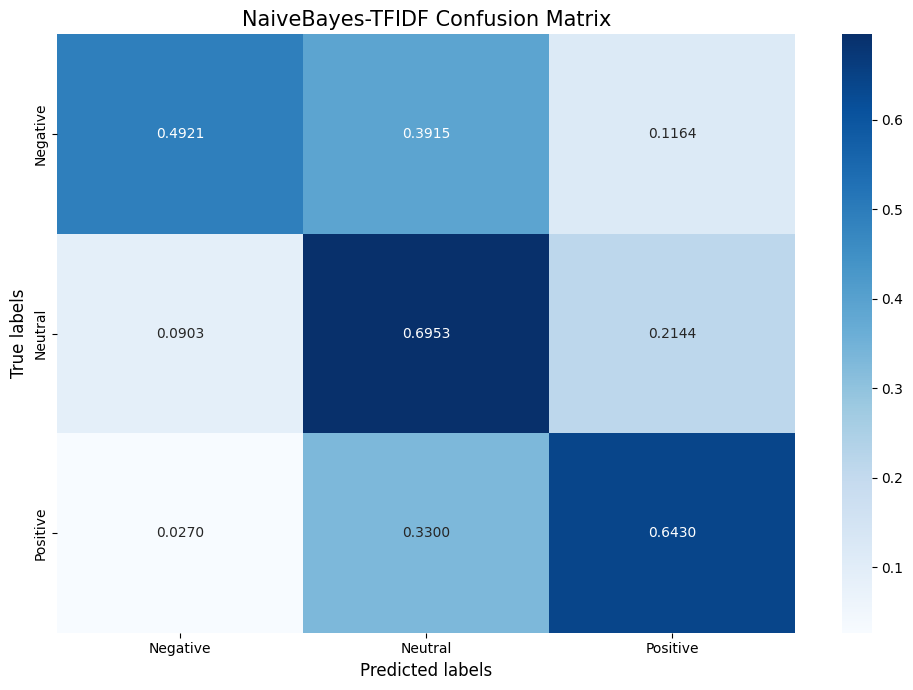

In [26]:
plot_confusion_matrix(y_dev, y_pred_dev, 'NaiveBayes-TFIDF')

## LSTM Implementation with Pytorch
Including LSTM-Glove, LSTM-BERT, LSTM-BERTweet

### LSTM-GloVe Implementation

In [27]:
# LSTM Sentiment Classifier with Glove Embeddings
import numpy as np
import pandas as pd
import os
from os.path import join
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Glove embeddings
def load_glove_embeddings(glove_path):
    embeddings_dict = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

embeddings_dict = load_glove_embeddings(glove_path)
embedding_dim = 100

def build_vocab(data_list, min_freq = 2, max_size = 5000):
    word_counts = {}

    #Count words frequency
    for data in data_list:
        for text in data.iloc[:, 2]:
            if isinstance(text, str):
                for word in text.split():
                    word_counts[word] = word_counts.get(word, 0) + 1
                    # Sort by frequency
    word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Create vocabulary with special tokens
    vocab = {'<pad>': 0, '<unk>': 1}
    idx =2
    #Add words that appear at least min_freq times 
    for word, count in word_counts:
        if count >= min_freq:
            vocab[word] = idx
            idx += 1
            if len(vocab) -2 >= max_size:
                break
    print(f"Vocabulary size: {len(vocab)}")
    return vocab


vocab= build_vocab([train_data_cleaned, dev_data_cleaned, test_data_cleaned, test_data_cleaned1, test_data_cleaned2],
               min_freq=3)

# Creat embedding matrix
def create_embedding_matrix(vocab, embeddings_dict, embed_dim = 100):
    embedding_matrix = np.zeros((len(vocab), embed_dim))
    found = 0
    for word, idx in vocab.items():
        if word in embeddings_dict:
            embedding_matrix[idx] = embeddings_dict[word]
            found += 1
    print(f"Found embeddings for {found} words out of {len(vocab)}")
    return embedding_matrix

embedding_matrix = create_embedding_matrix(vocab, embeddings_dict)

# Custom dataset for Pytorch
class TweetDataset(Dataset):
    def __init__(self, data, vocab, max_len=30):
        self.data = data
        self.vocab = vocab
        self.max_len = max_len
        
        # Convert labels to numbers
        label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
        self.labels = [label_map[label] for label in data.iloc[:, 1]]
        
        # PRE-FORMAT tweet IDs properly with leading zeros
        self.ids = []
        for id_val in data.iloc[:, 0]:
            # Convert to integer then format with leading zeros
            numeric_id = int(id_val)
            formatted_id = f"{numeric_id:018d}"
            self.ids.append(formatted_id)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx, 2]
        label = self.labels[idx]

        words = text.lower().split()
        indices = [self.vocab.get(word, self.vocab['<unk>']) for word in words]

    # TRUNCATE if too long (missing in your code)
        if len(indices) > self.max_len:
            indices = indices[:self.max_len]
    # Pad if too short
        elif len(indices) < self.max_len:
            indices += [self.vocab['<pad>']] * (self.max_len - len(indices))
    
        return torch.tensor(indices), torch.tensor(label), self.ids[idx]
# create data loaders
batch_size = 64
train_dataset = TweetDataset(train_data_cleaned, vocab)
dev_dataset = TweetDataset(dev_data_cleaned, vocab)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size)
test_datasets = [test_data_cleaned, test_data_cleaned1, test_data_cleaned2]
test_loaders = []
for test_data in test_datasets:
    test_dataset = TweetDataset(test_data, vocab)
    test_loaders.append(DataLoader(test_dataset, batch_size=batch_size))

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim =128, output_dim =3,
                 n_layer =1, bidirectional = True, dropout = 0.5,
                 embedding_matrix = None, freeze_embedding = True):
        super().__init__()

        #Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #Initalize with pre-trained embeddings
        if embedding_matrix is not None:
            self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
            if freeze_embedding:
                self.embedding.weight.requires_grad = False
        
        #LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layer,
                            bidirectional = bidirectional, 
                            dropout = dropout if n_layer > 1 else 0, 
                            batch_first = True)
        
        #Fully connected layer
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)

        #Dropout layer
        self.dropout = nn.Dropout(dropout)
    def forward(self, text):
        embedded = self.embedding(text)
        lstm_output, (hidden, cell) = self.lstm(embedded)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        return self.fc(hidden)

# Initialize model
vocab_size = len(vocab)
hidden_dim = 128
model = LSTMClassifier(vocab_size, embedding_dim, hidden_dim, embedding_matrix=embedding_matrix, freeze_embedding=True)
model= model.to(device)

#Set up training
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
n_epochs = 10

def train(model, iterator, optimizer, criterion):
    model.train()

    epoch_loss = 0
    epoch_acc = 0

    for batch in iterator:
        text, labels, _ = batch
        text = text.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        #forward pass
        predictions = model(text)

        #calculate loss
        loss = criterion(predictions, labels)

        #backwards pass
        loss.backward()

        #update parameters
        optimizer.step()

        #calculate accuracy
        preds = torch.argmax(predictions, dim = 1)
        correct = (preds == labels).float().sum()
        acc = correct / len(labels) 
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#Evaluation function
def evaluate_model(model, iterator, criterion):
    model.eval()

    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []
    all_ids = []

    with torch.no_grad():
        for batch in iterator:
            text, labels, ids = batch
            text = text.to(device)
            labels = labels.to(device)

            predictions = model(text)

            loss = criterion(predictions, labels)

            preds = torch.argmax(predictions, dim = 1)
            correct = (preds == labels).float().sum()
            acc = correct / len(labels)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_ids.extend(ids)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), all_preds, all_labels, all_ids

# Train model
best_valid_loss = float('inf')
best_f1 = 0.0
for epoch in range(n_epochs):
    start_time = time.time()
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc, valid_preds, valid_y, valid_ids = evaluate_model(model, dev_loader, criterion)

    # Calculate F1 score
    valid_f1 = f1_score(valid_y, valid_preds, average='weighted')

    #Save if best model
    if valid_f1 > best_f1:
        best_f1 = valid_f1
        torch.save(model.state_dict(), 'best-model.pt')
    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
# Load best model
model.load_state_dict(torch.load('best-model.pt'))

# Evaluate on development set
_, dev_acc, dev_preds, dev_y, dev_ids = evaluate_model(model, dev_loader, criterion)
print(f"LSTM Dev Accuracy: {dev_acc:.4f}")
print(f"LSTM Dev F1 Score: {f1_score(dev_y, dev_preds, average='weighted'):.4f}")
print(classification_report(dev_y, dev_preds, target_names=['negative', 'neutral', 'positive']))

# Evaluate on test sets
label_map_reverse = {0: 'negative', 1: 'neutral', 2: 'positive'}

for i, (test_loader, test_path) in enumerate(zip(test_loaders, test_paths)):
    print(f"\nTest Set {i+1} Results:")
    
    # Get predictions
    _, test_acc, test_preds, test_y, test_ids = evaluate_model(model, test_loader, criterion)
    
    # Create dictionary with predictions - IDs already formatted
    id_preds = {}
    for idx, pred in zip(test_ids, test_preds):
        # No conversion needed, IDs are already correctly formatted
        id_preds[idx] = label_map_reverse[pred]
    
    # Evaluate using provided functions
    confusion(id_preds, test_path, "LSTM-GloVe")
    evaluate(id_preds, test_path, "LSTM-GloVe")


Using device: cuda
Vocabulary size: 5002
Found embeddings for 4132 words out of 5002
Epoch: 01 | Epoch Time: 0.0m 4.0317137241363525s
	Train Loss: 0.896 | Train Acc: 56.88%
	 Val. Loss: 0.830 |  Val. Acc: 61.23%
Epoch: 02 | Epoch Time: 0.0m 3.4933712482452393s
	Train Loss: 0.823 | Train Acc: 61.72%
	 Val. Loss: 0.791 |  Val. Acc: 63.48%
Epoch: 03 | Epoch Time: 0.0m 3.3381123542785645s
	Train Loss: 0.798 | Train Acc: 63.28%
	 Val. Loss: 0.785 |  Val. Acc: 64.16%
Epoch: 04 | Epoch Time: 0.0m 3.343945026397705s
	Train Loss: 0.778 | Train Acc: 64.30%
	 Val. Loss: 0.769 |  Val. Acc: 64.26%
Epoch: 05 | Epoch Time: 0.0m 3.2426209449768066s
	Train Loss: 0.762 | Train Acc: 65.37%
	 Val. Loss: 0.764 |  Val. Acc: 64.60%
Epoch: 06 | Epoch Time: 0.0m 3.2300846576690674s
	Train Loss: 0.742 | Train Acc: 66.51%
	 Val. Loss: 0.757 |  Val. Acc: 64.06%
Epoch: 07 | Epoch Time: 0.0m 3.221204996109009s
	Train Loss: 0.722 | Train Acc: 67.48%
	 Val. Loss: 0.746 |  Val. Acc: 66.16%
Epoch: 08 | Epoch Time: 0.0m

C:\Users\Jc\AppData\Local\Temp\ipykernel_18072\3436407521.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best-model.pt'))


Confusion matrix for twitter-test1.txt (LSTM-GloVe):
              negative   neutral    positive 
negative  :    0.32       0.55       0.13   
neutral   :    0.03       0.75       0.22   
positive  :    0.03       0.32       0.65   
twitter-test1.txt (LSTM-GloVe): 0.557

Test Set 2 Results:
Confusion matrix for twitter-test2.txt (LSTM-GloVe):
              negative   neutral    positive 
negative  :    0.29       0.52       0.19   
neutral   :    0.03       0.68       0.30   
positive  :    0.02       0.26       0.72   
twitter-test2.txt (LSTM-GloVe): 0.565

Test Set 3 Results:
Confusion matrix for twitter-test3.txt (LSTM-GloVe):
              negative   neutral    positive 
negative  :    0.31       0.56       0.13   
neutral   :    0.06       0.78       0.16   
positive  :    0.05       0.38       0.57   
twitter-test3.txt (LSTM-GloVe): 0.518


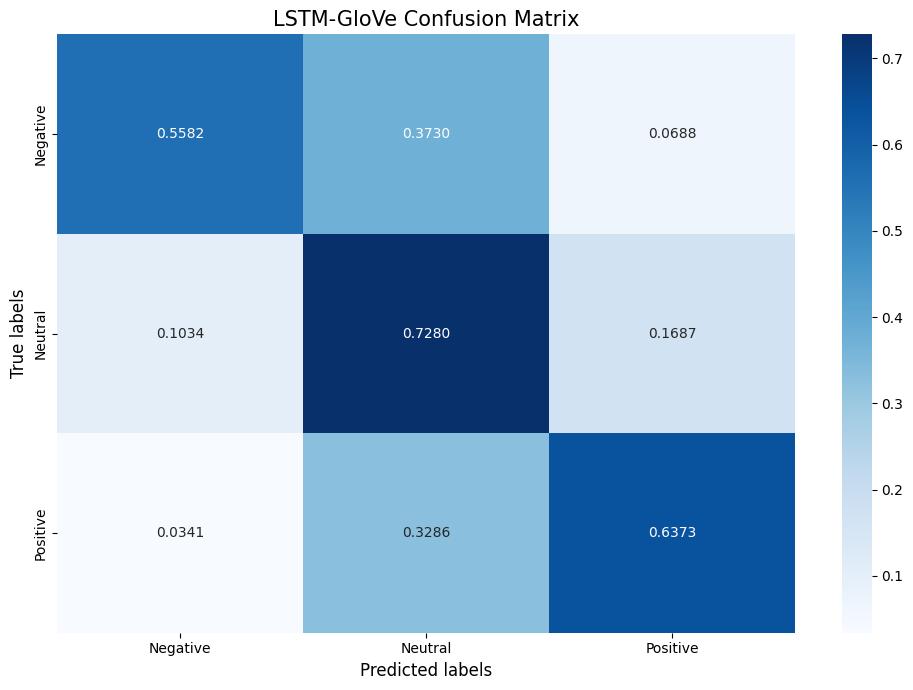

In [28]:
plot_confusion_matrix(dev_y, dev_preds, 'LSTM-GloVe')

### LSTM-BERT implementation 


In [29]:
import numpy as np
import pandas as pd
import os
from os.path import join
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.utils.class_weight import compute_class_weight

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN = 64

# Custom dataset for Bert model
class BERTTweetDataSet(Dataset):
    def __init__(self, data, tokenizer, max_len):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len

        # Convert labels to numbers
        label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
        self.labels = [label_map[label] for label in data.iloc[:, 1]]

        # Format tweet IDs properly with leading zeros
        self.ids = []
        for id_val in data.iloc[:, 0]:
            numeric_id = int(id_val)
            formatted_id = f"{numeric_id:018d}"
            self.ids.append(formatted_id)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        text = self.data.iloc[idx, 2]
        label = self.labels[idx]
        tweet_id = self.ids[idx]

        # Tokenize text
        encoding = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length = self.max_len,
            return_token_type_ids = True,
            padding = 'max_length',
            truncation = True, 
            return_attention_mask = True,
            return_tensors = 'pt'
        )
        
        return {
            'input_ids' :encoding['input_ids'].flatten(),
            'attention_mask' : encoding['attention_mask'].flatten(),  
            'token_type_ids' : encoding['token_type_ids'].flatten(),   
            'label' : torch.tensor(label, dtype=torch.long),
            'tweet_id': tweet_id
        }
def create_data_loader(data, tokenizer, max_len, batch_size):
    dataset = BERTTweetDataSet(data, tokenizer, max_len)
    return DataLoader(dataset, batch_size=batch_size)

Batch_size = 32
Epochs = 5

train_data_loader = create_data_loader(train_data_cleaned, tokenizer, MAX_LEN, Batch_size)
dev_data_loader = create_data_loader(dev_data_cleaned, tokenizer, MAX_LEN, Batch_size)
test_data_loader = [
    create_data_loader(test_data_cleaned, tokenizer, MAX_LEN, Batch_size),
    create_data_loader(test_data_cleaned1, tokenizer, MAX_LEN, Batch_size),
    create_data_loader(test_data_cleaned2, tokenizer, MAX_LEN, Batch_size)
]

#Bert model
class BertSentimentClassifier(nn.Module):
    def __init__(self, bert_model_name = 'bert-base-uncased', num_classes = 3):
        super().__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.drop = nn.Dropout(0.5)
        self.out = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids = input_ids,
            attention_mask = attention_mask,
            token_type_ids = token_type_ids
        )
        pooled_output = outputs.pooler_output
        pooled_output = self.drop(pooled_output)
        logits = self.out(pooled_output)
        return logits


train_labels = [label for label in train_data_cleaned.iloc[:, 1]]
classes = np.unique(train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes = classes, y= train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Initialize model
model = BertSentimentClassifier()
model = model.to(device)

# Set up optimizer and scheduler
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=5e-6)

# Learning rate scheduler
total_steps = len(train_data_loader) * Epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


gradient_accumulation_steps = 2

# Training function with gradient accumulation
def train_bert(model, data_loader, optimizer, scheduler, criterion):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    n_batches = 0
    optimizer.zero_grad()  # Zero gradients at the beginning of epoch

    for i, batch in enumerate(data_loader):  # FIXED: Added enumerate to get batch index
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask, token_type_ids)
        
        # Backward pass
        loss = criterion(outputs, labels) / gradient_accumulation_steps
        loss.backward()
        
        # Only update weights after accumulating gradients
        if (i+1) % gradient_accumulation_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()  # Zero gradients after update

        # Calculate accuracy
        _, preds = torch.max(outputs, dim=1)
        correct = (preds == labels).float().sum()
        acc = correct / len(labels)

        epoch_loss += loss.item() * gradient_accumulation_steps  # Scale loss back up for reporting
        epoch_acc += acc.item()
        n_batches += 1

        # print progress every 50 batches
        if n_batches % 50 == 0:
            print(f"Batch: {n_batches}, Loss: {loss.item()*gradient_accumulation_steps:.4f}, Acc: {acc.item():.4f}")
            
    # Handle any remaining gradients at the end of epoch
    if len(data_loader) % gradient_accumulation_steps != 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return epoch_loss / n_batches, epoch_acc / n_batches

# Evaluation function
def evaluate_bert(model, data_loader, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    all_preds = []
    all_labels = []
    all_ids = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, token_type_ids)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, dim=1)
            correct = (preds == labels).float().sum()
            acc = correct / len(labels)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_ids.extend(batch['tweet_id'])

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(data_loader), epoch_acc / len(data_loader), all_preds, all_labels, all_ids

# Train model
best_f1 = 0.0
for epoch in range(Epochs):
    print(f'Epoch {epoch + 1}/{Epochs}')
    print('-' * 30)

    start_time = time.time()

    train_loss, train_acc = train_bert(model, train_data_loader, optimizer, scheduler, criterion)
    valid_loss, valid_acc, valid_preds, valid_y, valid_ids = evaluate_bert(model, dev_data_loader, criterion)

    # Calculate F1 score   
    valid_f1 = f1_score(valid_y, valid_preds, average='weighted')
    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.4f} |  Val. Acc: {valid_acc*100:.2f}%')

    # Save best model
    if valid_f1 > best_f1:
        best_f1 = valid_f1
        torch.save(model.state_dict(), 'best-bert-model.pt')
        print(f"Saved new best model with F1: {valid_f1:.4f}")
# Load best model
model.load_state_dict(torch.load('best-bert-model.pt'))

# Evaluate on development set
dev_loss, dev_acc, dev_preds, dev_y, dev_ids = evaluate_bert(model, dev_data_loader, criterion)
print(f"Bert Dev Accuracy: {dev_acc:.4f}")
print(f"Bert Dev F1 Score: {f1_score(dev_y, dev_preds, average='weighted'):.4f}")
print(classification_report(dev_y, dev_preds, target_names=['negative', 'neutral', 'positive']))

#Evaluate on test sets
label_map_reverse = {0: 'negative', 1: 'neutral', 2: 'positive'}
for i, (test_loader, test_path) in enumerate(zip(test_data_loader, test_paths)):
        print(f"\nTest Set {i+1} Results:")

        # Get predictions
        _, test_acc, test_preds, test_y, test_ids = evaluate_bert(model, test_loader, criterion)

        # Create dictionary with predictions - IDs already formatted
        id_preds = {}
        for idx, pred in zip(test_ids, test_preds):
            # No conversion needed, IDs are already correctly formatted
            id_preds[idx] = label_map_reverse[pred]

        # Evaluate using provided functions
        confusion(id_preds, test_path, "BERT")
        evaluate(id_preds, test_path, "BERT")




c:\Users\Jc\anaconda3\envs\torch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


c:\Users\Jc\anaconda3\envs\torch-gpu\lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
------------------------------
Batch: 50, Loss: 1.1457, Acc: 0.3750
Batch: 100, Loss: 1.1467, Acc: 0.3125
Batch: 150, Loss: 1.0408, Acc: 0.4375
Batch: 200, Loss: 0.9912, Acc: 0.5312
Batch: 250, Loss: 0.8944, Acc: 0.4688
Batch: 300, Loss: 0.8552, Acc: 0.5625
Batch: 350, Loss: 1.0874, Acc: 0.4062
Batch: 400, Loss: 0.8074, Acc: 0.6250
Batch: 450, Loss: 0.9461, Acc: 0.3750
Batch: 500, Loss: 0.8629, Acc: 0.5625
Batch: 550, Loss: 0.9344, Acc: 0.4688
Batch: 600, Loss: 0.7457, Acc: 0.6250
Batch: 650, Loss: 0.7251, Acc: 0.7500
Batch: 700, Loss: 0.8108, Acc: 0.5625
Batch: 750, Loss: 0.5457, Acc: 0.7812
Batch: 800, Loss: 0.6227, Acc: 0.6875
Batch: 850, Loss: 0.5925, Acc: 0.6875
Batch: 900, Loss: 0.6091, Acc: 0.7188
Batch: 950, Loss: 0.8296, Acc: 0.6562
Batch: 1000, Loss: 0.7622, Acc: 0.5625
Batch: 1050, Loss: 0.6560, Acc: 0.7188
Batch: 1100, Loss: 0.7274, Acc: 0.6562
Batch: 1150, Loss: 0.7893, Acc: 0.5938
Batch: 1200, Loss: 0.6479, Acc: 0.7188
Batch: 1250, Loss: 0.7930, Acc: 0.6875
Batc

C:\Users\Jc\AppData\Local\Temp\ipykernel_18072\2474951525.py:231: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best-bert-model.pt'))


Bert Dev Accuracy: 0.7252
Bert Dev F1 Score: 0.7225
              precision    recall  f1-score   support

    negative       0.63      0.78      0.70       378
     neutral       0.78      0.61      0.69       919
    positive       0.73      0.85      0.78       703

    accuracy                           0.73      2000
   macro avg       0.71      0.75      0.72      2000
weighted avg       0.74      0.73      0.72      2000


Test Set 1 Results:
Confusion matrix for twitter-test1.txt (BERT):
              negative   neutral    positive 
negative  :    0.68       0.25       0.06   
neutral   :    0.04       0.71       0.26   
positive  :    0.03       0.18       0.80   
twitter-test1.txt (BERT): 0.752

Test Set 2 Results:
Confusion matrix for twitter-test2.txt (BERT):
              negative   neutral    positive 
negative  :    0.65       0.27       0.07   
neutral   :    0.04       0.66       0.30   
positive  :    0.01       0.14       0.84   
twitter-test2.txt (BERT): 0.765

Test

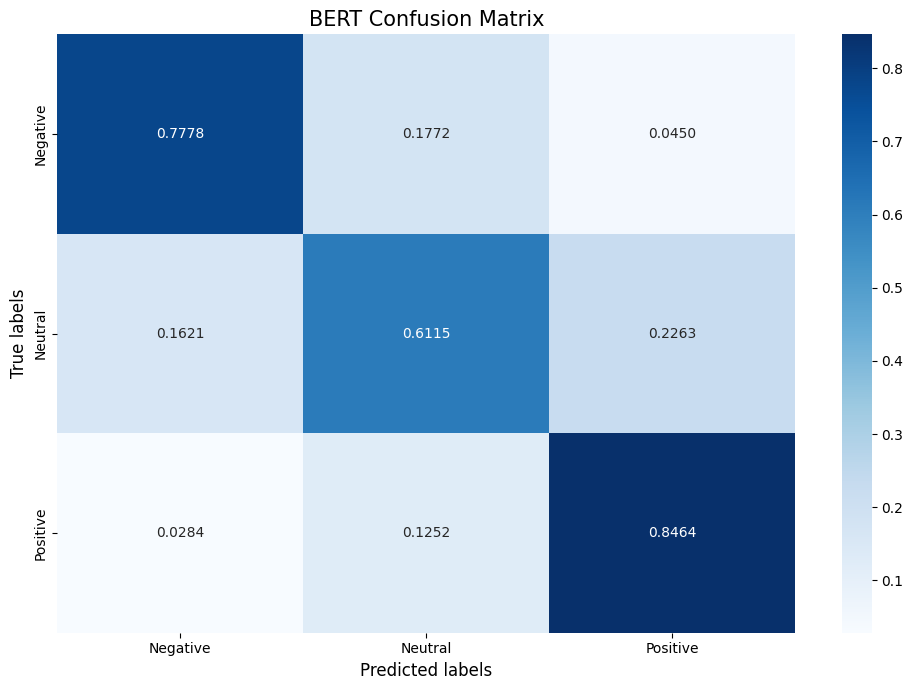

In [30]:
plot_confusion_matrix(dev_y, dev_preds, 'BERT')

### LSTM-BERTweet Implementation

In [31]:
# BERTweet Implementation
import numpy as np
import torch
import torch.nn as nn
from os.path import join
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import time
import pandas as pd

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load BERTweet tokenizer and model
print("Loading BERTweet tokenizer and model...")
bertweet_tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", 
                                                  use_fast=False,
                                                  normalization=True)
                                                  
# Custom dataset class for BERTweet
class BERTweetDataset(Dataset):
    def __init__(self, data, tokenizer, max_len=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len
        
        # Convert labels to numbers
        label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
        self.labels = [label_map[label] for label in data.iloc[:, 1]]
        
        # Format tweet IDs properly with leading zeros
        self.ids = []
        for id_val in data.iloc[:, 0]:
            numeric_id = int(id_val)
            formatted_id = f"{numeric_id:018d}"
            self.ids.append(formatted_id)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx, 2]
        label = self.labels[idx]
        tweet_id = self.ids[idx]
        
        # Apply BERTweet special preprocessing
        text = ' '.join(['@user' if word.startswith('@') else word for word in text.split()])
        text = ' '.join(['http' if word.startswith('http') else word for word in text.split()])
        
        # Tokenize text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long),
            'tweet_id': tweet_id
        }

# Create data loaders
def create_bertweet_loader(df, tokenizer, max_len, batch_size):
    dataset = BERTweetDataset(df, tokenizer, max_len)
    return DataLoader(dataset, batch_size=batch_size, shuffle=(df is train_data_cleaned))

# BERTweet model class
class BERTweetClassifier(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.bertweet = AutoModelForSequenceClassification.from_pretrained(
            "vinai/bertweet-base", 
            num_labels=num_classes
        )
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bertweet(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        return outputs.logits

# Parameters
BATCH_SIZE = 32
MAX_LEN = 64
EPOCHS = 5
gradient_accumulation_steps = 2

# Create data loaders
print("Creating BERTweet dataloaders...")
train_bertweet_loader = create_bertweet_loader(train_data_cleaned, bertweet_tokenizer, MAX_LEN, BATCH_SIZE)
dev_bertweet_loader = create_bertweet_loader(dev_data_cleaned, bertweet_tokenizer, MAX_LEN, BATCH_SIZE)
test_bertweet_loaders = [
    create_bertweet_loader(test_data_cleaned, bertweet_tokenizer, MAX_LEN, BATCH_SIZE),
    create_bertweet_loader(test_data_cleaned1, bertweet_tokenizer, MAX_LEN, BATCH_SIZE),
    create_bertweet_loader(test_data_cleaned2, bertweet_tokenizer, MAX_LEN, BATCH_SIZE)
]

# Initialize BERTweet model
print("Initializing BERTweet model...")
bertweet_model = BERTweetClassifier()
bertweet_model = bertweet_model.to(device)

# Compute class weights for balanced performance
train_labels = [label for label in train_data_cleaned.iloc[:, 1]]
classes = np.unique(train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Set up optimizer with weight decay
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in bertweet_model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in bertweet_model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=5e-6)  # Lower learning rate for stability

# Learning rate scheduler
total_steps = len(train_bertweet_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training function with gradient accumulation
def train_bertweet(model, data_loader, optimizer, scheduler, criterion):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    n_batches = 0
    optimizer.zero_grad()  # Zero gradients at the beginning
    
    for i, batch in enumerate(data_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask)
        
        # Calculate loss and backward pass
        loss = criterion(outputs, labels) / gradient_accumulation_steps
        loss.backward()
        
        # Update weights after accumulation steps
        if (i + 1) % gradient_accumulation_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
        
        # Calculate accuracy
        _, preds = torch.max(outputs, dim=1)
        correct = (preds == labels).float().sum()
        acc = correct / len(labels)
        
        epoch_loss += loss.item() * gradient_accumulation_steps  # Scale loss back for reporting
        epoch_acc += acc.item()
        n_batches += 1
        
        # Print progress
        if n_batches % 50 == 0:
            print(f"Batch {n_batches}/{len(data_loader)}, Loss: {loss.item()*gradient_accumulation_steps:.4f}, Acc: {acc.item():.4f}")
    
    # Handle any remaining gradients
    if len(data_loader) % gradient_accumulation_steps != 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return epoch_loss / n_batches, epoch_acc / n_batches

# Evaluation function
def evaluate_bertweet(model, data_loader, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    
    all_preds = []
    all_labels = []
    all_ids = []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            tweet_ids = batch['tweet_id']
            
            # Forward pass
            outputs = model(input_ids, attention_mask)
            
            # Calculate loss
            loss = criterion(outputs, labels)
            
            # Calculate accuracy
            _, preds = torch.max(outputs, dim=1)
            correct = (preds == labels).float().sum()
            acc = correct / len(labels)
            
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            # Store predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_ids.extend(tweet_ids)
    
    return epoch_loss / len(data_loader), epoch_acc / len(data_loader), all_preds, all_labels, all_ids

# Train the BERTweet model
print("Training BERTweet model...")
best_f1 = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-' * 30)
    
    start_time = time.time()
    
    train_loss, train_acc = train_bertweet(bertweet_model, train_bertweet_loader, optimizer, scheduler, criterion)
    valid_loss, valid_acc, valid_preds, valid_y, valid_ids = evaluate_bertweet(bertweet_model, dev_bertweet_loader, criterion)
    
    # Calculate F1 score
    valid_f1 = f1_score(valid_y, valid_preds, average='weighted')
    
    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs:.2f}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tVal. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% | F1: {valid_f1:.3f}')
    
    # Save if best model
    if valid_f1 > best_f1:
        best_f1 = valid_f1
        torch.save(bertweet_model.state_dict(), 'best-bertweet-model.pt')
        print(f'Saved new best model with F1: {valid_f1:.3f}')

# Load best model for evaluation
bertweet_model.load_state_dict(torch.load('best-bertweet-model.pt'))

# Evaluate on development set
dev_loss, dev_acc, dev_preds, dev_y, dev_ids = evaluate_bertweet(bertweet_model, dev_bertweet_loader, criterion)
print(f"BERTweet Dev Accuracy: {dev_acc:.4f}")
print(f"BERTweet Dev F1 Score: {f1_score(dev_y, dev_preds, average='weighted'):.4f}")
print(classification_report(dev_y, dev_preds, target_names=['negative', 'neutral', 'positive']))

# Evaluate on test sets
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

for i, (test_loader, test_path) in enumerate(zip(test_bertweet_loaders, test_paths)):
    print(f"\nTest Set {i+1} Results:")
    
    # Get predictions
    _, test_acc, test_preds, test_y, test_ids = evaluate_bertweet(bertweet_model, test_loader, criterion)
    
    # Create dictionary with predictions
    id_preds = {}
    for idx, pred in zip(test_ids, test_preds):
        id_preds[idx] = label_map[pred]
    
    # Evaluate using the provided functions
    confusion(id_preds, test_path, "BERTweet")
    evaluate(id_preds, test_path, "BERTweet")

Using device: cuda
Loading BERTweet tokenizer and model...


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Creating BERTweet dataloaders...
Initializing BERTweet model...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Jc\anaconda3\envs\torch-gpu\lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training BERTweet model...
Epoch 1/5
------------------------------
Batch 50/1410, Loss: 1.1034, Acc: 0.2812
Batch 100/1410, Loss: 1.0624, Acc: 0.5000
Batch 150/1410, Loss: 1.0546, Acc: 0.5000
Batch 200/1410, Loss: 0.9482, Acc: 0.4688
Batch 250/1410, Loss: 0.8353, Acc: 0.5312
Batch 300/1410, Loss: 0.8272, Acc: 0.6250
Batch 350/1410, Loss: 0.7569, Acc: 0.5312
Batch 400/1410, Loss: 0.7416, Acc: 0.5938
Batch 450/1410, Loss: 0.5414, Acc: 0.8125
Batch 500/1410, Loss: 0.8072, Acc: 0.7812
Batch 550/1410, Loss: 0.6655, Acc: 0.6250
Batch 600/1410, Loss: 0.6479, Acc: 0.6875
Batch 650/1410, Loss: 0.6601, Acc: 0.6562
Batch 700/1410, Loss: 0.6549, Acc: 0.7812
Batch 750/1410, Loss: 0.5684, Acc: 0.7188
Batch 800/1410, Loss: 0.5414, Acc: 0.7812
Batch 850/1410, Loss: 0.5771, Acc: 0.6875
Batch 900/1410, Loss: 0.6909, Acc: 0.6562
Batch 950/1410, Loss: 0.9386, Acc: 0.5625
Batch 1000/1410, Loss: 0.5972, Acc: 0.6875
Batch 1050/1410, Loss: 0.5329, Acc: 0.6875
Batch 1100/1410, Loss: 0.5584, Acc: 0.7812
Batch 

C:\Users\Jc\AppData\Local\Temp\ipykernel_18072\298595132.py:250: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bertweet_model.load_state_dict(torch.load('best-bertweet-model

BERTweet Dev Accuracy: 0.7426
BERTweet Dev F1 Score: 0.7400
              precision    recall  f1-score   support

    negative       0.64      0.88      0.74       378
     neutral       0.82      0.61      0.70       919
    positive       0.74      0.84      0.79       703

    accuracy                           0.74      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.76      0.74      0.74      2000


Test Set 1 Results:
Confusion matrix for twitter-test1.txt (BERTweet):
              negative   neutral    positive 
negative  :    0.74       0.23       0.03   
neutral   :    0.05       0.71       0.23   
positive  :    0.02       0.17       0.80   
twitter-test1.txt (BERTweet): 0.772

Test Set 2 Results:
Confusion matrix for twitter-test2.txt (BERTweet):
              negative   neutral    positive 
negative  :    0.68       0.26       0.05   
neutral   :    0.04       0.71       0.25   
positive  :    0.01       0.16       0.84   
twitter-test2.txt

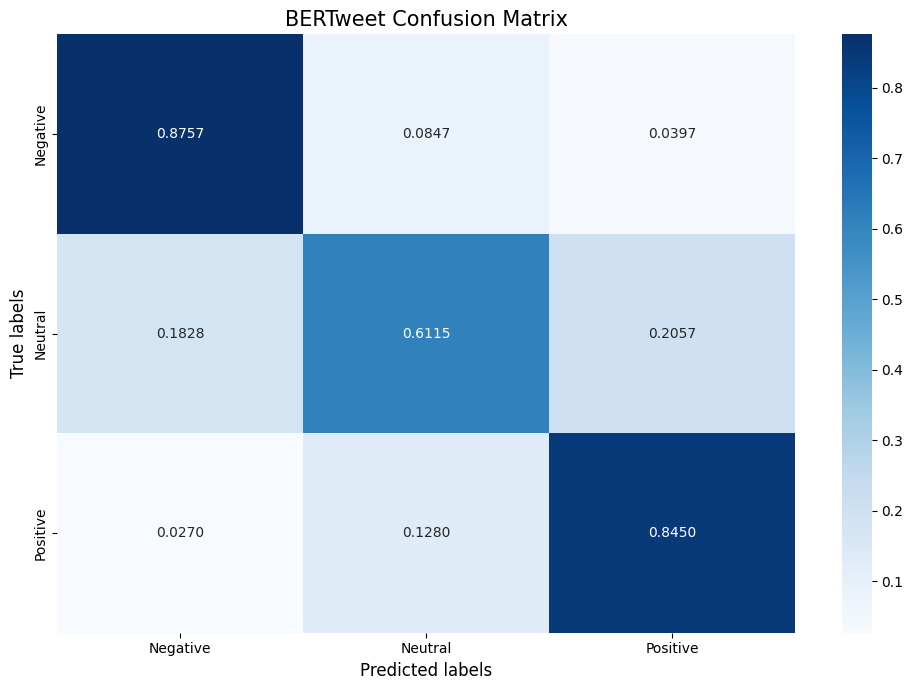

In [32]:
plot_confusion_matrix(dev_y, dev_preds, 'BERTweet')

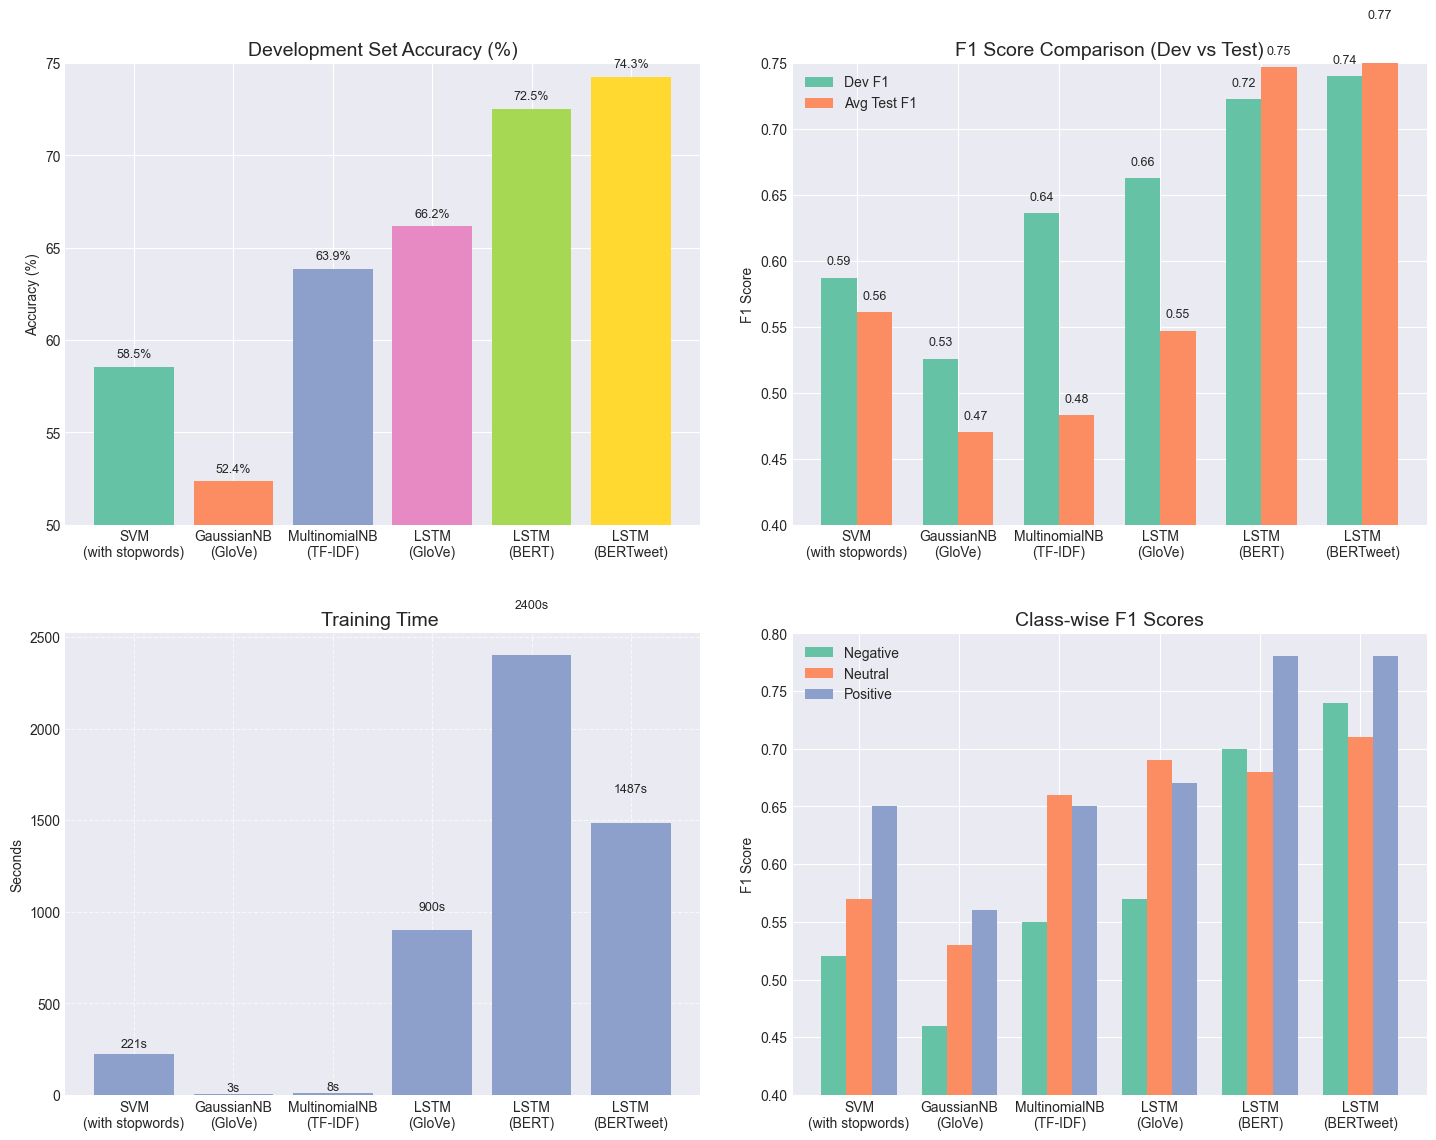


Model Comparison Summary Table:


,Model,Dev Accuracy (%),Dev F1 Score,Test F1 Score (avg),Training Time (s),F1 - Negative,F1 - Neutral,F1 - Positive
0,SVM\n(with stopwords),58.55,0.5874,0.561,221,0.52,0.57,0.65
1,GaussianNB\n(GloVe),52.35,0.5259,0.470,3,0.46,0.53,0.56
2,MultinomialNB\n(TF-IDF),63.85,0.6362,0.483,8,0.55,0.66,0.65
3,LSTM\n(GloVe),66.16,0.6628,0.547,900,0.57,0.69,0.67
4,LSTM\n(BERT),72.52,0.7225,0.747,2400,0.70,0.68,0.78
5,LSTM\n(BERTweet),74.26,0.7400,0.774,1487,0.74,0.71,0.78


In [4]:
# Model Comparison Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Define the models and their metrics
models = ['SVM\n(with stopwords)', 'GaussianNB\n(GloVe)', 'MultinomialNB\n(TF-IDF)', 'LSTM\n(GloVe)', 'LSTM\n(BERT)', 'LSTM\n(BERTweet)']

# Performance metrics
dev_accuracy = [58.55, 52.35, 63.85, 66.16, 72.52, 74.26]  # in percentage
dev_f1 = [0.5874, 0.5259, 0.6362, 0.6628, 0.7225, 0.7400]
avg_test_f1 = [0.561, 0.470, 0.483, 0.547, 0.747, 0.774]
training_time = [221, 3, 8, 900, 2400, 1487]  # in seconds

# Class-wise F1 scores
class_f1 = {
    'negative': [0.52, 0.46, 0.55, 0.57, 0.70, 0.74],
    'neutral': [0.57, 0.53, 0.66, 0.69, 0.68, 0.71],
    'positive': [0.65, 0.56, 0.65, 0.67, 0.78, 0.78]
}

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 12))

# 1. Plot accuracy comparison
plt.subplot(2, 2, 1)
bars = plt.bar(models, dev_accuracy, color=sns.color_palette("Set2"))
plt.title('Development Set Accuracy (%)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.ylim([50, 75])  # Set y-axis limit for better visualization
plt.xticks(rotation=0)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', fontsize=9)

# 2. Plot F1 score comparison
plt.subplot(2, 2, 2)
x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, dev_f1, width, label='Dev F1')
bars2 = plt.bar(x + width/2, avg_test_f1, width, label='Avg Test F1')

plt.title('F1 Score Comparison (Dev vs Test)', fontsize=14)
plt.ylabel('F1 Score')
plt.xlabel('')
plt.xticks(x, models)
plt.ylim([0.4, 0.75])
plt.legend()

# Add values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', fontsize=9)

# 3. Plot training time (log scale for better visualization)
plt.subplot(2, 2, 3)
bars = plt.bar(models, training_time, color=sns.color_palette("Set2")[2])
plt.title('Training Time ', fontsize=14)
plt.ylabel('Seconds')
plt.grid(True, which="both", ls="--", alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height * 1.1,
            f'{height:.0f}s', ha='center', va='bottom', fontsize=9)

# 4. Plot class-wise F1 scores
plt.subplot(2, 2, 4)
x = np.arange(len(models))
width = 0.25

bars1 = plt.bar(x - width, class_f1['negative'], width, label='Negative')
bars2 = plt.bar(x, class_f1['neutral'], width, label='Neutral')
bars3 = plt.bar(x + width, class_f1['positive'], width, label='Positive')

plt.title('Class-wise F1 Scores', fontsize=14)
plt.ylabel('F1 Score')
plt.xlabel('')
plt.xticks(x, models)
plt.ylim([0.4, 0.8])
plt.legend()

# Adjust layout and save
plt.tight_layout(pad=3.0)
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a dataframe for tabular comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Dev Accuracy (%)': dev_accuracy,
    'Dev F1 Score': dev_f1,
    'Test F1 Score (avg)': avg_test_f1,
    'Training Time (s)': training_time,
    'F1 - Negative': class_f1['negative'],
    'F1 - Neutral': class_f1['neutral'],
    'F1 - Positive': class_f1['positive']
})

# Display the comparison table
print("\nModel Comparison Summary Table:")
display(comparison_df)
